# CAPSTONE PROJECT - AD RECOMMENDER SYSTEM

## Surbhi Sinha

### PART2 - Model Building & Training

This is part 2 of of the Capstone project, in this notebook we will do these:
1. Do the train test split of data
2. Prepare model for the two given scenarios.
3. Train various model with the data
4. Validate the accuracy of the model
5. Create model output to be used in flask application

In [2]:
# Add all required imports
import pandas as pd
import numpy as np
import os

# For model export
import pickle

# For plotting
import matplotlib.pyplot as plt

# Required for Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier

# KFold - Cross Validation
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV

# Different metrics for evaluation and display
from sklearn.metrics import roc_curve,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix,accuracy_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For re-purpose of data
import category_encoders as category_encoders

import warnings
warnings.filterwarnings("ignore")

## 1. Train Test Split

In [3]:
# Load the train test data with events and location
device_events_train_test_merged_df = pd.read_csv("model_input/device_events_train_test_merged.csv")
device_events_train_test_merged_df.head()

,device_id,gender,age_group,traveller_type,highlevelcategory,cluster,event_count,phone_brand,device_model,train_test_flag
0,-7548291590301750000,1,2,0.696701,0.589212,0.707334,1.398279,0.734277,0.713415,train
1,4543988487649880000,1,3,0.743972,0.719878,0.707334,-0.207751,0.693680,0.663796,train
2,-1819925713085810000,0,0,0.743972,0.589212,0.707334,-0.214099,0.597403,0.479366,train
3,3585775875204580000,0,3,0.696701,0.719878,0.707334,-0.366450,0.712083,0.714556,train
4,7442042493953950000,1,1,0.696701,0.719878,0.707334,-0.442625,0.734277,0.745318,train


In [4]:
# Load the train test data with events and location
device_without_location_train_test_merged_df = pd.read_csv("model_input/device_without_location_train_test_merged.csv")
device_without_location_train_test_merged_df.head()

,device_id,gender,age,age_group,phone_brand,device_model,train_test_flag
0,398514470209561000,1,68,3,0.664493,0.664430,train
1,-3073918292047050000,1,27,1,0.664493,0.706468,train
2,5805880616488060000,1,39,2,0.689542,0.692912,train
3,-2403560729305410000,1,25,1,0.681667,0.720682,train
4,-1889893391998300000,1,22,0,0.664493,0.673285,train


In [5]:
train_df=device_events_train_test_merged_df[device_events_train_test_merged_df["train_test_flag"]=="train"]
test_df=device_events_train_test_merged_df[device_events_train_test_merged_df["train_test_flag"]=="test"]

In [6]:
train_df

,device_id,gender,age_group,traveller_type,highlevelcategory,cluster,event_count,phone_brand,device_model,train_test_flag
0,-7548291590301750000,1,2,0.696701,0.589212,0.707334,1.398279,0.734277,0.713415,train
1,4543988487649880000,1,3,0.743972,0.719878,0.707334,-0.207751,0.693680,0.663796,train
2,-1819925713085810000,0,0,0.743972,0.589212,0.707334,-0.214099,0.597403,0.479366,train
3,3585775875204580000,0,3,0.696701,0.719878,0.707334,-0.366450,0.712083,0.714556,train
4,7442042493953950000,1,1,0.696701,0.719878,0.707334,-0.442625,0.734277,0.745318,train
...,...,...,...,...,...,...,...,...,...,...
8926,-7218221365876010000,1,1,0.696701,0.702925,0.707334,-0.442625,0.734277,0.736434,train
8927,-3559980869201690000,0,1,0.696701,0.719878,0.707334,-0.448973,0.734277,0.761814,train
8928,2168571045625280000,1,1,0.696701,0.719878,0.707334,-0.322014,0.734277,0.668979,train
8929,2481005796267730000,0,3,0.696701,0.719878,0.707334,0.795225,0.693680,0.726679,train


In [7]:
test_df

,device_id,gender,age_group,traveller_type,highlevelcategory,cluster,event_count,phone_brand,device_model,train_test_flag
8931,2948104315232910000,0,3,0.696701,0.719878,0.668000,-0.429929,0.693680,0.566434,test
8932,8231243155939480000,0,3,0.696701,0.719878,0.707334,1.480803,0.734277,0.677254,test
8933,7217910398487470000,1,1,0.696701,0.719878,0.707334,-0.404538,0.734277,0.763877,test
8934,8642523170587800000,0,1,0.743972,0.719878,0.707334,-0.379146,0.693680,0.566434,test
8935,6628613590050850000,0,1,0.696701,0.719878,0.707334,-0.442625,0.693680,0.643172,test
...,...,...,...,...,...,...,...,...,...,...
11975,-8182466045892470000,1,1,0.696701,0.719878,0.707334,-0.385494,0.734277,0.736434,test
11976,-1265118755230090000,0,0,0.696701,0.719878,0.707334,-0.429929,0.785515,0.697479,test
11977,4395207728535340000,1,1,0.696701,0.719878,0.707334,-0.391842,0.712083,0.714556,test
11978,-537035954505421000,1,1,0.743972,0.719878,0.707334,-0.385494,0.693680,0.716962,test


In [8]:
x_train=train_df.drop(["age_group","gender","device_id","train_test_flag"],axis=1)
x_test=test_df.drop(["age_group","gender","device_id","train_test_flag"],axis=1)

y_gender_train=train_df["gender"]
y_gender_test=test_df["gender"]

## 2. Model Building

#### Evaluation Methods
Before we start building the models, we will define some methods which will be used for evaluation of different models

##### Confusion Matrix

Confusion matrix is a table (2x2 for binary classification) which which displays the performance of a classification model on a set of test data for which the true values are known. The confusion matrix provides a comprehensive view of the performance of a classification model and allows the calculation of various performance metrics such as accuracy, precision, recall, F1 score, and others. These metrics can be calculated using the values from the confusion matrix.

In [9]:
def plot_confusion_matrix(model, x_test, y_test):
    plt.figure(figsize=(8,5))
    y_prediction = model.predict(x_test)
    confusion_matrix1  = confusion_matrix(y_test, y_prediction)
    ConfusionMatrixDisplay(confusion_matrix1).plot()
    plt.grid(False)
    plt.show()

##### Lift Gain

The `lift_gain` method calculates various performance metrics, including Lift, Gain, and the Kolmogorov-Smirnov (KS) statistic, based on a model's predicted probabilities and true labels. It divides the predictions into deciles, computes cumulative metrics and the KS statistic for each decile, and extracts probability bands for the top and bottom deciles. This provides insights into the model's performance across different probability ranges and facilitates evaluation and understanding of its behavior.








In [10]:
def lift_gain(model, x_train, y_train):
    # Predict probabilities for the training data
    y_train_prediction_probability = model.predict_proba(x_train)[:, 1]

    # Sort the predicted probabilities in ascending order
    sorted_probabilities = np.sort(y_train_prediction_probability)

    # Calculate the number of samples per decile
    decile_size = len(sorted_probabilities) // 10

    # Divide the probabilities into deciles
    deciles = [sorted_probabilities[i * decile_size : (i+1) * decile_size] for i in range(10)]

    # Calculate cumulative response rate and cumulative capture rate for each decile
    cumulative_response = [np.sum(y_train[i * decile_size : (i+1) * decile_size]) for i in range(10)]
    cumulative_capture = np.cumsum(cumulative_response) / np.sum(y_train)

    # Calculate KS statistic for each decile
    ks_statistic = np.abs(np.arange(1, 11) / 10 - cumulative_capture)

    # Sort the deciles based on the KS statistic
    sorted_deciles = np.argsort(ks_statistic)
    
    # Convert sorted_deciles to an integer array
    sorted_deciles = sorted_deciles.astype(int)

    # Get the probability bands for the top 3 and bottom 3 deciles      
    top_deciles=[]
    for i in sorted_deciles[-3:]:
        top_deciles.extend(deciles[i])
    top_decile_prob=min(top_deciles)
    
    bottom_deciles=[]
    for i in sorted_deciles[:3]:
        bottom_deciles.extend(deciles[i])
    bottom_deciles_prob=max(bottom_deciles)

    # Print the probability bands for the top 3 and bottom 3 deciles
    return top_decile_prob, bottom_deciles_prob, ks_statistic


##### ROC Curve

The `plot_roc_curve` function computes and plots the Receiver Operating Characteristic (ROC) curve for a given model's predictions on test data. It displays the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various probability thresholds, along with the Area Under the ROC Curve (ROC AUC) score. Additionally, it includes a dotted blue line representing the ROC curve for random predictions, aiding in the comparison of model performance.

In [11]:
def plot_roc_curve(model, x_test, y_test, label):
    y_score = model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
    roc_auc_scr = roc_auc_score(y_test, y_score[:,1])
    print("ROC Area Under Curve SCORE -> ", roc_auc_scr)
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, linestyle = '-',color = 'green',label=label)

    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.title('AUC-ROC Curve' + label)
    plt.plot(p_fpr,p_tpr,linestyle='--',color = 'blue')
    plt.show()

Now we will write a method to print all the evaluation metrics, plot different curve. The metrics used are:
1. Model Statistics - accuracy (test, train), precision, recall, F1 score
2. Plot of confusion metrics
3. For multiclass classification we print the log loss
4. For binary classification we do the lift gain and ROC Plot

In [12]:
def print_evaluation_metrics(model, x_test, y_test, label, accuracy, training_accuracy, recall, precision, f1_val, model_type, multiclass=False):
    
    top_decile_prob, bottom_deciles_prob, ks_statistic = lift_gain(model,x_test,y_test)
    
    print("---------------Model Statistics---------------")
    print(model_type + " Model Accuracy:", accuracy)
    print(model_type + " Model training Accuracy:", training_accuracy)
    print(model_type + " Model Precision:", precision)
    print(model_type + " Model Recall:", recall)
    print(model_type + " Model F1 Score:", f1_val)
    
    print("---------------Confusion Matrix---------------")
    plot_confusion_matrix(model, x_test, y_test)
    
    if multiclass:
        print("---------------Multiclass Log Loss---------------")
        y_pred_proba = model.predict_proba(x_test)
        logloss = log_loss(y_test, y_pred_proba)
        print("Multiclass Log Loss: {:.4f}".format(logloss))
    else:
        print("---------------Decile Analysis---------------")
        print("Top Probability:", top_decile_prob)
        print("Bottom Probability:", bottom_deciles_prob)
        print("KS Statistic")
        for i in range(10):
            print("Decile " + str(i) + ":", ks_statistic[i])
        print("---------------ROC Curve---------------")
        plot_roc_curve(model, x_test, y_test, label)

## Scenario 1 - Devices with Events

We will first build model for first scenario where we will do the analysis for devices with event data

### Gender Prediction

#### Gender Prediction - Logistic Regression

In [13]:
# Logistic Regression method
# The default penalty uses l2 (Ridge Regression) and LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) solver
def logistic_regression(x_train, y_train, x_test, y_test, penalty='l2', solver='lbfgs', average='binary'):
    model = LogisticRegression(penalty=penalty, solver=solver)
    model.fit(x_train, y_train)
    
    training_accuracy = accuracy_score(y_train, model.predict(x_train))
    # Predict the target variable for the test set
    y_prediction = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction, average=average)
    precision = precision_score(y_test, y_prediction, average=average)
    f1_val = f1_score(y_test, y_prediction, average=average)
    
    return y_prediction, accuracy, training_accuracy, recall, precision, f1_val, model

In [14]:
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_gender_1 = logistic_regression(x_train, y_gender_train, x_test, y_gender_test)

In [15]:
lr_gender_1

LogisticRegression()

---------------Model Statistics---------------
Gender Model Accuracy: 0.7212200721548049
Gender Model training Accuracy: 0.7096629716717053
Gender Model Precision: 0.7282645755199455
Gender Model Recall: 0.9757880310644129
Gender Model F1 Score: 0.8340491995314331
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

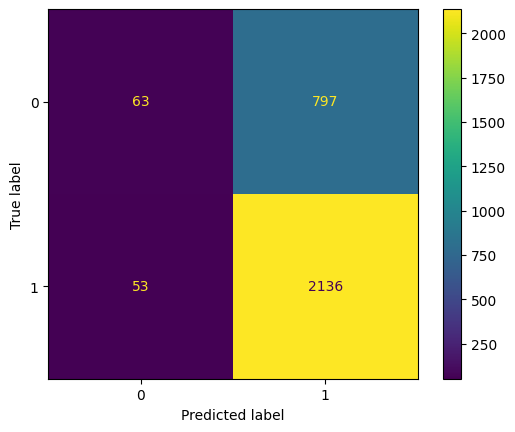

---------------Decile Analysis---------------
Top Probability: 0.6316585304687039
Bottom Probability: 0.7608180731494567
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6305903194620035


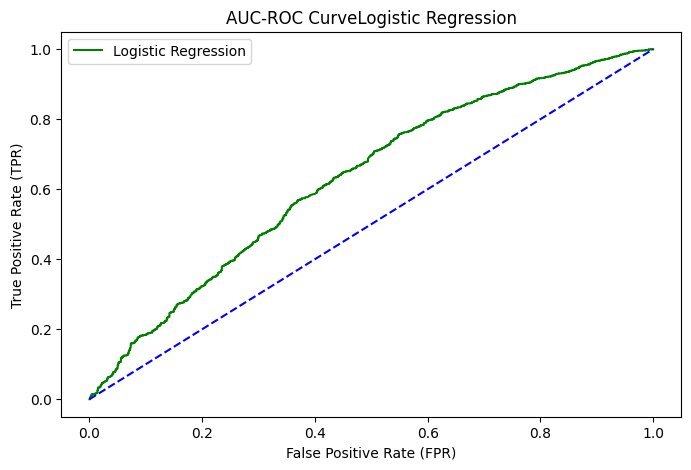

In [16]:
print_evaluation_metrics(lr_gender_1, x_test, y_gender_test, "Logistic Regression", accuracy, 
                         training_accuracy, recall, precision, f1_val, "Gender")

In [17]:
# Model after applying L1 (Lasso) Regularization
y_pred, accuracy, training_accuracy, recall, precision, f1_val, lr_gender_2 = logistic_regression(x_train, y_gender_train, x_test, y_gender_test, penalty='l1', solver='liblinear')

In [18]:
lr_gender_2

LogisticRegression(penalty='l1', solver='liblinear')

---------------Model Statistics---------------
Gender Model Accuracy: 0.7218760249262053
Gender Model training Accuracy: 0.7082073675960139
Gender Model Precision: 0.7300171526586621
Gender Model Recall: 0.972133394243947
Gender Model F1 Score: 0.8338557993730408
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

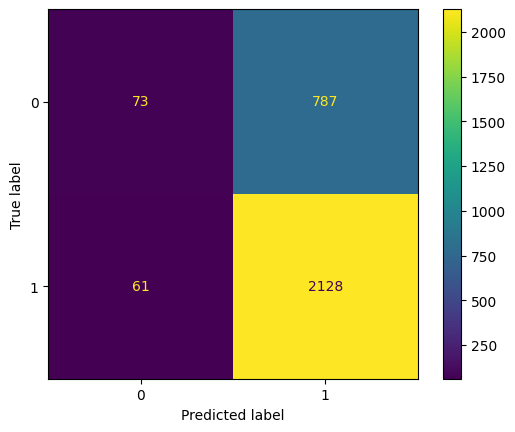

---------------Decile Analysis---------------
Top Probability: 0.6268187687711645
Bottom Probability: 0.7654137134495558
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6300686837995475


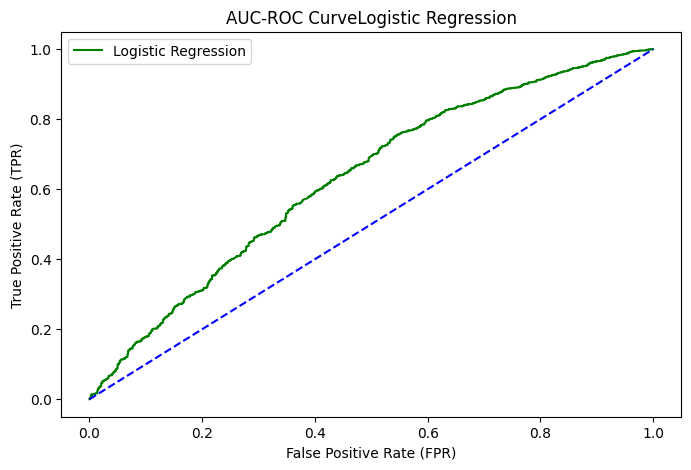

In [19]:
print_evaluation_metrics(lr_gender_2, x_test, y_gender_test, "Logistic Regression", accuracy, 
                         training_accuracy, recall, precision, f1_val, "Gender")

From the two variant of Logistic Regression, we see that the seond version is performing better than  first version with accuracy `0.7284355526402099` so we will finalise this.

In [20]:
# Since second model gives better accuracy, making second model as final logistic regression model
lr_gender=lr_gender_2

#### Gender Prediction Random Forest Classifier

In [21]:
# Random Forest method
def random_forest(x_train, y_train ,x_test, y_test, average='binary', **params):
    model = RandomForestClassifier(**params, random_state=100)
    model.fit(x_train,y_train)
    
    training_accuracy = accuracy_score(y_train, model.predict(x_train))
    y_prediction = model.predict(x_test)
    
    
    accuracy = accuracy_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction, average=average)
    precision = precision_score(y_test, y_prediction, average=average)
    f1_val = f1_score(y_test, y_prediction, average=average)
    
    return y_pred,accuracy,training_accuracy,recall,precision,f1_val,model

In [22]:
# Base Random Forest Model
y_pred, accuracy, training_accuracy, recall, precision, f1_val, rf_gender_1 = random_forest(x_train, y_gender_train, x_test, y_gender_test)

In [23]:
rf_gender_1

RandomForestClassifier(random_state=100)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6484093145293539
Gender Model training Accuracy: 0.9283394916582689
Gender Model Precision: 0.7299300123507616
Gender Model Recall: 0.8099588853357698
Gender Model F1 Score: 0.7678648765699437
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

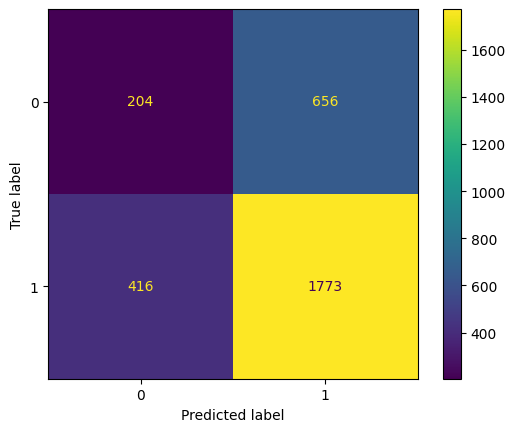

---------------Decile Analysis---------------
Top Probability: 0.49625
Bottom Probability: 0.89
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.5511667746767666


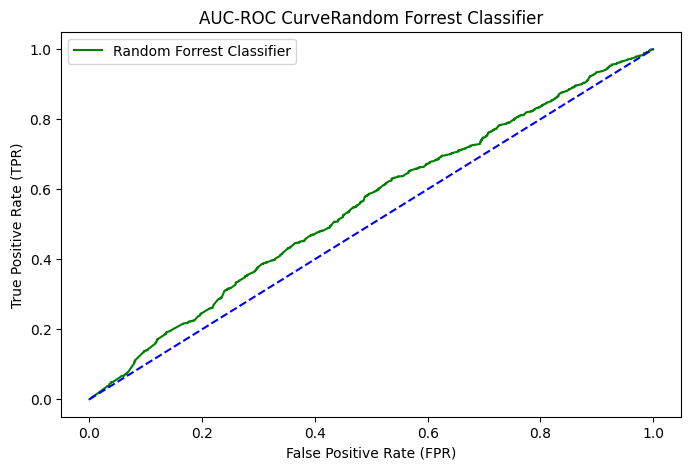

In [24]:
print_evaluation_metrics(rf_gender_1, x_test, y_gender_test, "Random Forrest Classifier", accuracy, 
                         training_accuracy, recall, precision, f1_val, "Gender")

#### Gender Prediction - Random Forest Hyperparameter Tuning with Cross Validation

In [25]:
# Cross Validation
def cross_validation(x_train, y_train, x_test, y_test, model, param_grid, k_fold=3, scoring="accuracy"):
    cv=GridSearchCV(model, param_grid=param_grid, 
                    cv=k_fold, return_train_score=True, 
                    n_jobs=-1, scoring=scoring)
    cv.fit(x_train,y_train)
    training_accuracy = accuracy_score(y_train,cv.predict(x_train))
    # Predict the target variable for the test set
    y_prediction = cv.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_prediction)
    
    
    return y_prediction, accuracy, training_accuracy, cv , cv.best_score_, cv.best_params_

In [26]:
param_grids = [
    {
        "n_estimators": [120, 130],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [100, 120],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [80, 100],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [50, 80],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [80],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [5],
        "max_leaf_nodes": [80, 100],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
]

In [27]:
best_accuracy = 0
best_params_gender = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_gender_train, x_test, y_gender_test, rf_gender_1, param_grid)
    print("Gender Model Accuracy:", accuracy)
    print("Gender Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_gender = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_gender)

--------------------  Param Set  0 --------------------
{'n_estimators': [120, 130], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [100, 120], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
Gender Model Accuracy: 0.725811741554608
Gender Model training Accuracy: 0.7332885455156197
Best CV Score: 0.7078714589631621
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 120, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 130, 'oob_score': True}
--------------------  Param Set  1 --------------------
{'n_estimators': [100, 120], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [100, 120], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
Gender Model Accuracy: 0.7238438832404067
Gender Model training Accuracy: 0.7307132459970888
Best CV Score: 0.7074235807860262
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 100, 'min_samples_leaf': 5, 'min_samples_split'

In [28]:
# Best Random Forest Model
y_pred, accuracy, training_accuracy, recall, precision, f1_val, rf_gender = random_forest(x_train, y_gender_train, x_test, y_gender_test, **best_params_gender)

In [29]:
rf_gender

RandomForestClassifier(max_depth=50, max_leaf_nodes=120, min_samples_leaf=5,
                       n_estimators=130, oob_score=True, random_state=100)

---------------Model Statistics---------------
Gender Model Accuracy: 0.725811741554608
Gender Model training Accuracy: 0.7332885455156197
Gender Model Precision: 0.7328743545611015
Gender Model Recall: 0.9725902238465053
Gender Model F1 Score: 0.8358853553199843
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

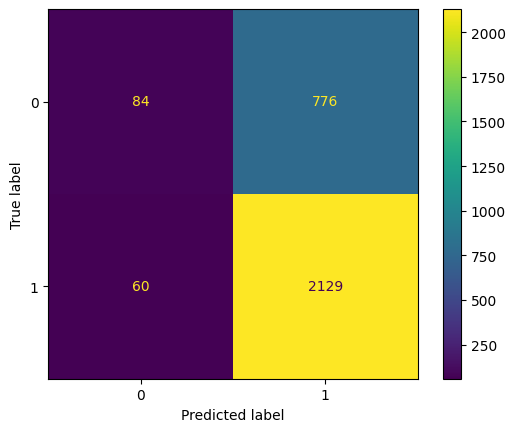

---------------Decile Analysis---------------
Top Probability: 0.6122615890874715
Bottom Probability: 0.7768039304671316
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6253059695942715


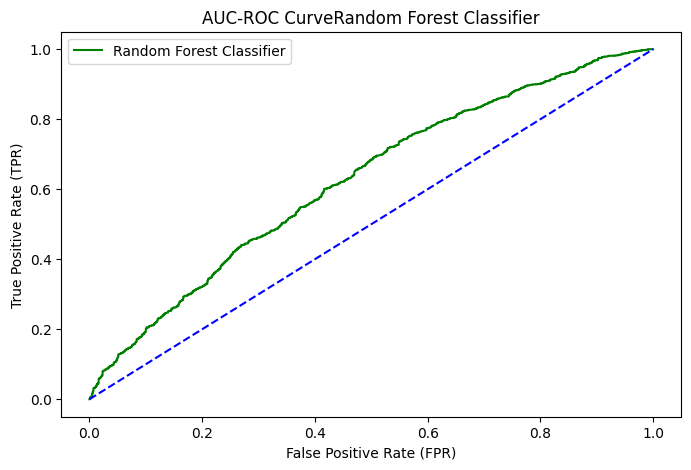

In [30]:
print_evaluation_metrics(rf_gender, x_test, y_gender_test, "Random Forest Classifier", accuracy, 
                         training_accuracy, recall, precision, f1_val, "Gender")

With the best parameters for this Random Forest model after hyper parameter tuning we have achived a model with accuracy of `0.7277795998688095`

#### Gender Prediction XG Boost

In [31]:
# XG Boost method
def xg_boost(x_train, y_train, x_test, y_test, average='binary', **params):
    model = XGBClassifier(**params, random_state=100)
    model.fit(x_train, y_train)
    
    training_accuracy = accuracy_score(y_train, model.predict(x_train))
    # Predict the target variable for the test set
    y_prediction = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction, average=average)
    precision = precision_score(y_test, y_prediction, average=average)
    f1_val  = f1_score(y_test, y_prediction, average=average)
    
    return y_prediction, accuracy, training_accuracy, recall, precision, f1_val, model

In [32]:
#Base XG Boost Model

y_prediction, accuracy, training_accuracy, recall, precision, f1_val, xgb_gender_base = xg_boost(x_train, y_gender_train, x_test, y_gender_test)

In [33]:
xgb_gender_base

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6989176779271893
Gender Model training Accuracy: 0.7835628708991155
Gender Model Precision: 0.7333822989349982
Gender Model Recall: 0.9122887163088168
Gender Model F1 Score: 0.8131107491856677
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

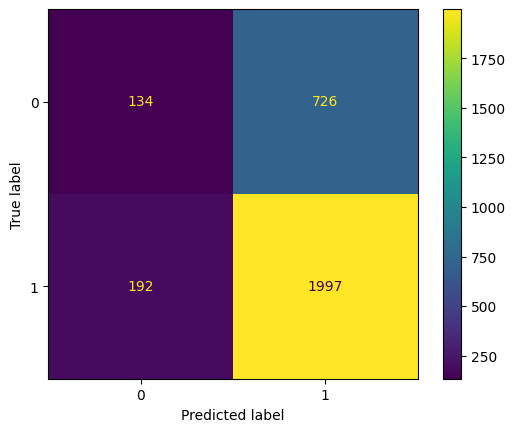

---------------Decile Analysis---------------
Top Probability: 0.592071
Bottom Probability: 0.80653703
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.5845493322851041


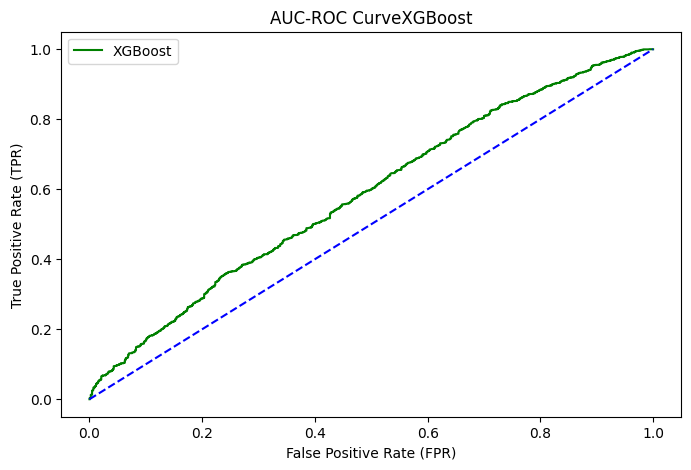

In [34]:
print_evaluation_metrics(xgb_gender_base, x_test, y_gender_test, "XGBoost", accuracy, 
                         training_accuracy, recall, precision, f1_val, "Gender")

#### Gender Prediction -  - XG Boost Hyperparameter Tuning with Cross Validation

In [35]:
param_grids = [
    {
        "n_estimators": [10, 20],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20, 50],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20, 50],
        "max_depth": [3, 6],
        "learning_rate": [0.3, 0.4],
        "min_child_weight": [2, 3],
        "gamma": [0.2, 0.3],
    },
    {
        "n_estimators": [50, 80],
        "max_depth": [3, 6],
        "learning_rate": [0.3, 0.4],
        "min_child_weight": [2, 3],
        "gamma": [0.2, 0.3],
    },
    {
        "n_estimators": [50],
        "max_depth": [2, 3],
        "learning_rate": [0.3, 0.4],
        "min_child_weight": [3, 4],
        "gamma": [0.2, 0.3],
    },
]

In [36]:
best_accuracy = 0
best_params_gender = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_gender_train, x_test, y_gender_test, xgb_gender_base, param_grid)
    print("Gender Model Accuracy:", accuracy)
    print("Gender Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_gender = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_gender)

--------------------  Param Set  0 --------------------
{'n_estimators': [10, 20], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
Gender Model Accuracy: 0.7218760249262053
Gender Model training Accuracy: 0.7144776620759153
Best CV Score: 0.7095510021274215
Best Paramater: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 10}
--------------------  Param Set  1 --------------------
{'n_estimators': [20, 50], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
Gender Model Accuracy: 0.7274516234831092
Gender Model training Accuracy: 0.7180606874930019
Best CV Score: 0.7084313066845818
Best Paramater: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}
--------------------  Param Set  2 --------------------
{'n_estimators': [20, 50], 'max_depth': [3, 6], 'learning_rate': [0.3, 0.4], 'min_child_weight': [2, 3

In [37]:
# Best XGBoost Model
y_pred, accuracy, training_accuracy, recall, precision, f1_val, xgb_gender = xg_boost(x_train, y_gender_train, x_test, y_gender_test, **best_params_gender)

In [38]:
xgb_gender

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

---------------Model Statistics---------------
Gender Model Accuracy: 0.7274516234831092
Gender Model training Accuracy: 0.7180606874930019
Gender Model Precision: 0.7318989071038251
Gender Model Recall: 0.9789858382823207
Gender Model F1 Score: 0.8376001563416064
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

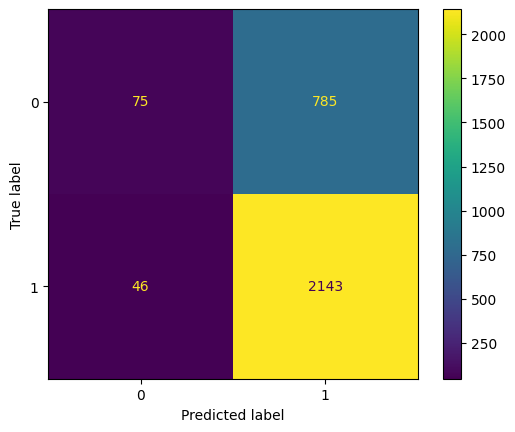

---------------Decile Analysis---------------
Top Probability: 0.6333017
Bottom Probability: 0.776175
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6350263473817289


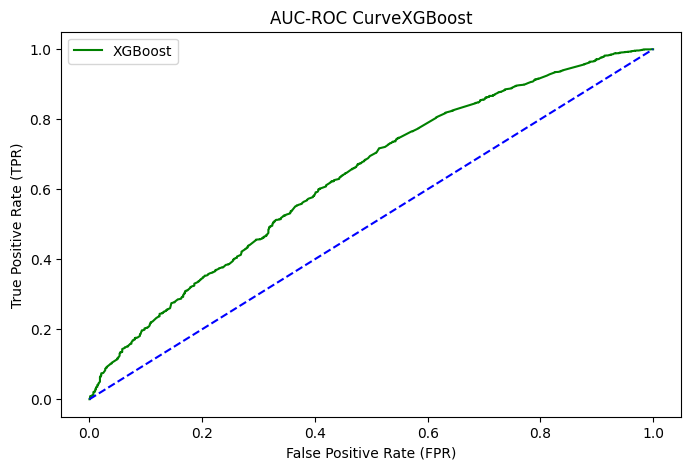

In [39]:
print_evaluation_metrics(xgb_gender, x_test, y_gender_test, "XGBoost", accuracy, 
                         training_accuracy, recall, precision, f1_val, "Gender")

#### Gender Prediction - Model Stacking

In [40]:
def model_stacking(x_train, y_train, x_test, y_test, classifiers, meta_classifier, average='binary'):
    
    stacking = StackingCVClassifier(classifiers=classifiers, meta_classifier=meta_classifier, use_probas=True, cv=3)
    stacking.fit(x_train,y_train)
    
    training_accuracy = accuracy_score(y_train,stacking.predict(x_train))
    
    # Predict the target variable for the test set
    y_prediction = stacking.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction, average=average)
    precision = precision_score(y_test, y_prediction, average=average)
    f1_val = f1_score(y_test, y_prediction, average=average)
    
    return y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking

##### Gender Prediction - Model Stacking - 1

In this case of stacking we will stack Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [41]:
classifiers = [lr_gender,rf_gender]
y_prediction , accuracy, training_accuracy, recall, precision, f1_val, stacking_gender_1 = model_stacking(x_train, y_gender_train, x_test, y_gender_test, classifiers, xgb_gender)

In [42]:
stacking_gender_1

StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                     solver='liblinear'),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=120,
                                                         min_samples_leaf=5,
                                                         n_estimators=130,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=XGBClassifier(base_score=None,
                                                   booster=None, callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytre...
                                                   gamma=0.2, grow_policy=None,
                                                   importance_type=None,
                                                   interaction_constraints=None,
                                                   learning_rate=0.1,
                                                   max_bin=None,
                                                   max_cat_threshold=None,
                                                   max_cat_to_onehot=None,
                                                   max_delta_step=None,
                                                   max_depth=3, max_leaves=None,
                                                   min_child_weight=2,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   multi_strategy=None,
                                                   n_estimators=50, n_jobs=None,
                                                   num_parallel_tree=None,
                                                   random_state=100, ...),
                     use_probas=True)

---------------Model Statistics---------------
Gender Model Accuracy: 0.724171859626107
Gender Model training Accuracy: 0.7167170529615945
Gender Model Precision: 0.7294077603812117
Gender Model Recall: 0.9789858382823207
Gender Model F1 Score: 0.8359664521162473
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

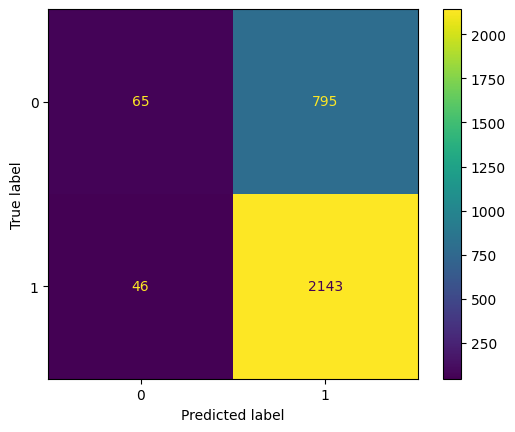

---------------Decile Analysis---------------
Top Probability: 0.61145216
Bottom Probability: 0.7762254
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6321238858138473


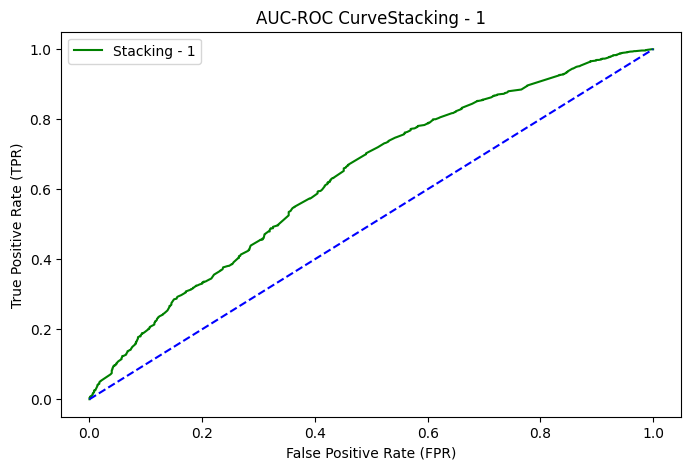

In [43]:
print_evaluation_metrics(stacking_gender_1, x_test, y_gender_test, "Stacking - 1", 
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

##### Gender Prediction - Model Stacking - 2

In this case of stacking we will stack XGBoost and random forest as classifier and XGBoost as Logistic regression Meta classifier

In [44]:
classifiers = [xgb_gender, rf_gender]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_gender_2 = model_stacking(x_train, y_gender_train, x_test, y_gender_test, classifiers, lr_gender)

In [45]:
stacking_gender_2

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.2,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=...
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=50, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=100, ...),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=120,
                                                         min_samples_leaf=5,
                                                         n_estimators=130,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=LogisticRegression(penalty='l1',
                                                        solver='liblinear'),
                     use_probas=True)

---------------Model Statistics---------------
Gender Model Accuracy: 0.725811741554608
Gender Model training Accuracy: 0.7183965961258537
Gender Model Precision: 0.7335174318260269
Gender Model Recall: 0.9707629054362723
Gender Model F1 Score: 0.8356272119543846
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

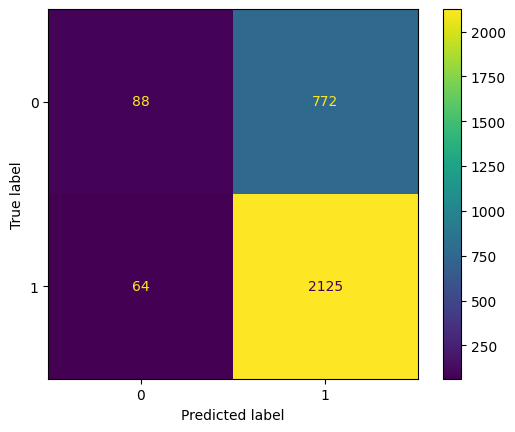

---------------Decile Analysis---------------
Top Probability: 0.6310258765248845
Bottom Probability: 0.7799435184257203
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.634382005163237


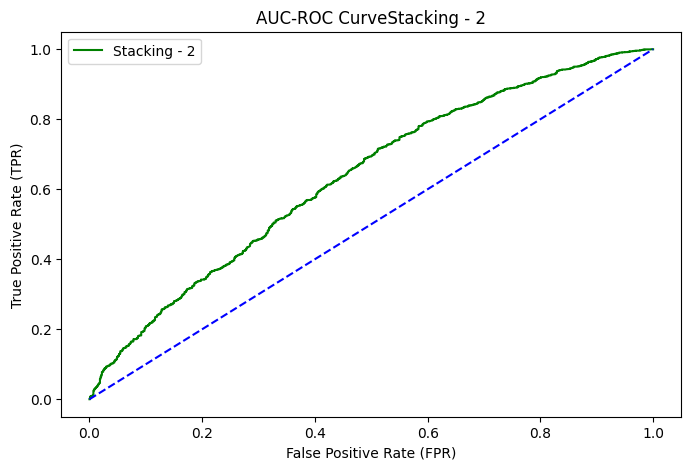

In [46]:
print_evaluation_metrics(stacking_gender_2, x_test, y_gender_test, "Stacking - 2", 
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

##### Gender Prediction - Model Stacking - 3

In this case of stacking we will stack XGBoost and Logistic regression as classifier and XGBoost as Random Forest Meta classifier

In [47]:
classifiers = [lr_gender, xgb_gender]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_gender_3 = model_stacking(x_train, y_gender_train, x_test, y_gender_test, classifiers, rf_gender)

In [48]:
stacking_gender_3

StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                     solver='liblinear'),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.2,
                                                grow_policy=None,
                                                importance_t...
                                                max_delta_step=None,
                                                max_depth=3, max_leaves=None,
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=50, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=100, ...)],
                     cv=3,
                     meta_classifier=RandomForestClassifier(max_depth=50,
                                                            max_leaf_nodes=120,
                                                            min_samples_leaf=5,
                                                            n_estimators=130,
                                                            oob_score=True,
                                                            random_state=100),
                     use_probas=True)

---------------Model Statistics---------------
Gender Model Accuracy: 0.7225319776976058
Gender Model training Accuracy: 0.7107826671145449
Gender Model Precision: 0.7295726495726496
Gender Model Recall: 0.9748743718592965
Gender Model F1 Score: 0.8345717637856863
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

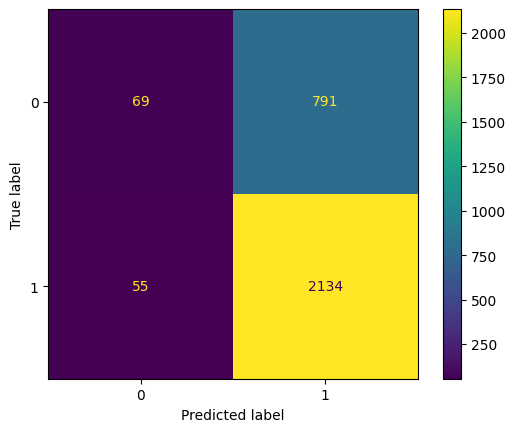

---------------Decile Analysis---------------
Top Probability: 0.617789841615736
Bottom Probability: 0.7889204595708087
KS Statistic
Decile 0: 0.0017816354499771703
Decile 1: 0.00264961169483785
Decile 2: 0.004431247144814965
Decile 3: 0.0007309273640931924
Decile 4: 0.00296939241662858
Decile 5: 0.0038373686614892044
Decile 6: 0.0019643672910003573
Decile 7: 0.0032891731384193656
Decile 8: 0.005070808588396591
Decile 9: 0.002740977615349527
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6298365506177823


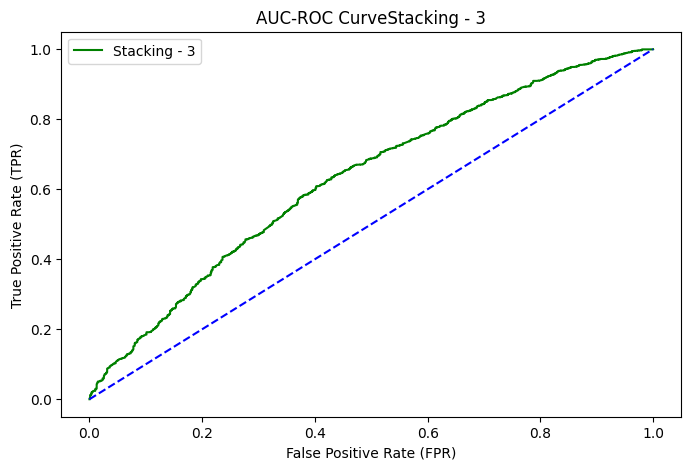

In [49]:
print_evaluation_metrics(stacking_gender_3, x_test, y_gender_test, "Stacking - 3", 
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

In [50]:
# Since Model 1 gives best accuracy, considering it is best Stacking Model
stacking_gender = stacking_gender_1

### Gender Prediction - Final Model Selection

For the final model from the logistic regression, random forest, XG Boost & Stacking model the accuracy obtained are:

1. logistic regression - `0.7284355526402099`
2. random forest - `0.7277795998688095`
3. XG Boost - `0.727123647097409`
4. Stacking - ` 0.7267956707117088`

From the above 4, we see that logistic regression has the highest accuracy, so we will use logistic regression for the gender prediction

In [51]:
final_model_gender = lr_gender
final_model_gender

LogisticRegression(penalty='l1', solver='liblinear')

We will now export this model which we will use in our Flask application for Gender Prediction

In [52]:
# Define the directory path
directory = 'models'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

pickle.dump(final_model_gender,open("models/model_gender.pkl","wb"))

## Age Group Prediction

#### Dataset preparation

We have done the target encoding of data for gender, before we start the prediction we will first re-number the data for a new target

In [53]:
train_df.head()

,device_id,gender,age_group,traveller_type,highlevelcategory,cluster,event_count,phone_brand,device_model,train_test_flag
0,-7548291590301750000,1,2,0.696701,0.589212,0.707334,1.398279,0.734277,0.713415,train
1,4543988487649880000,1,3,0.743972,0.719878,0.707334,-0.207751,0.693680,0.663796,train
2,-1819925713085810000,0,0,0.743972,0.589212,0.707334,-0.214099,0.597403,0.479366,train
3,3585775875204580000,0,3,0.696701,0.719878,0.707334,-0.366450,0.712083,0.714556,train
4,7442042493953950000,1,1,0.696701,0.719878,0.707334,-0.442625,0.734277,0.745318,train


In [54]:
#target encoding
target_columns = ['age_group']

cat_columns = ["traveller_type", "highlevelcategory", "cluster", "phone_brand", "device_model"]
encoder = category_encoders.TargetEncoder(cols=cat_columns)

encoder.fit(train_df, train_df["age_group"])

train_df = encoder.transform(train_df)
test_df = encoder.transform(test_df)

x_train = train_df.drop(["age_group", "gender", "device_id", "train_test_flag"], axis=1)
x_test = test_df.drop(["age_group", "gender", "device_id", "train_test_flag"], axis=1)

y_age_group_train = train_df["age_group"]

y_age_group_test = test_df["age_group"]

#### Age group prediction - Logistic Regression

In [55]:
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_age_group_1 = logistic_regression(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted")

In [56]:
lr_age_group_1

LogisticRegression()

---------------Model Statistics---------------
Age Group Model Accuracy: 0.4358806165956051
Age Group Model training Accuracy: 0.43645728361885566
Age Group Model Precision: 0.3749654116186978
Age Group Model Recall: 0.4358806165956051
Age Group Model F1 Score: 0.33006455706174037
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

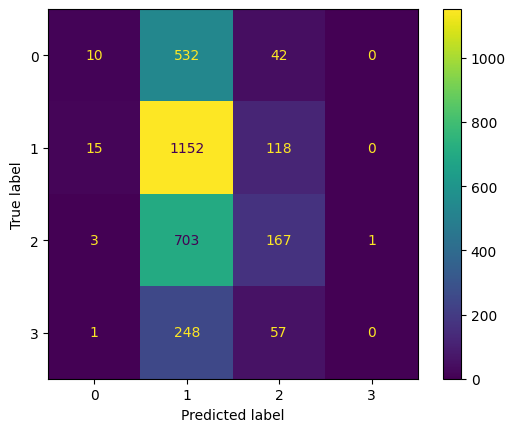

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2408


In [57]:
print_evaluation_metrics(lr_age_group_1, x_test, y_age_group_test, "Logistic Regression",
                         accuracy, training_accuracy, recall, precision, f1_val,"Age Group", multiclass=True)

In [58]:
# Model after applying L1 (Lasso) Regularization
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_age_group_2 = logistic_regression(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted", penalty='l1', solver='liblinear')

In [59]:
lr_age_group_2

LogisticRegression(penalty='l1', solver='liblinear')

---------------Model Statistics---------------
Age Group Model Accuracy: 0.43522466382420466
Age Group Model training Accuracy: 0.4363453140745717
Age Group Model Precision: 0.30801308299678404
Age Group Model Recall: 0.43522466382420466
Age Group Model F1 Score: 0.3196494537582496
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

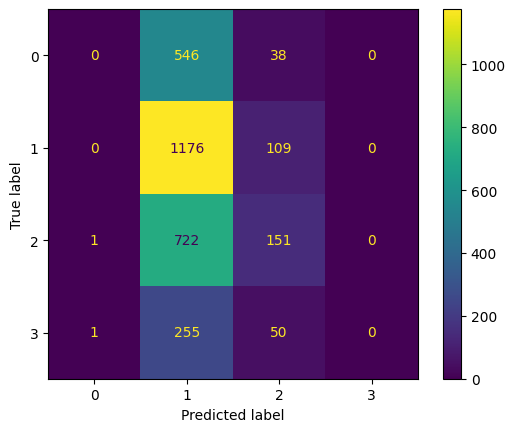

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2406


In [60]:
print_evaluation_metrics(lr_age_group_2, x_test, y_age_group_test, "Logistic Regression",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

##### Logisitc Regression model selection
With L2 Penalty we have model accuracy of `0.43522466382420466` while with l1 we have `0.43555264020990486`
l1 is slightly better than l2, so we will chose the second model here as logistic regression model

In [61]:
lr_age_group = lr_age_group_2

#### Age group prediction - Random Forest Classifier

In [62]:
# Base Random Forest Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, rf_age_group_1 = random_forest(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted")

In [63]:
rf_age_group_1

RandomForestClassifier(random_state=100)

---------------Model Statistics---------------
age_group Model Accuracy: 0.36766152836995736
age_group Model training Accuracy: 0.8766095621990818
age_group Model Precision: 0.34921952059058176
age_group Model Recall: 0.36766152836995736
age_group Model F1 Score: 0.35617246458681867
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

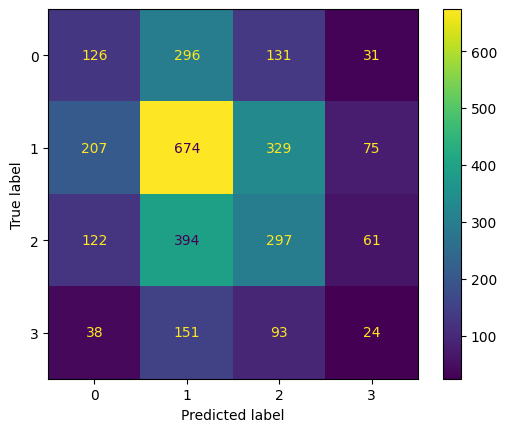

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 3.0329


In [64]:
print_evaluation_metrics(rf_age_group_1, x_test, y_age_group_test, "Random Forest",
                         accuracy, training_accuracy, recall, precision, f1_val, "age_group", multiclass=True)

### Age Group Prediction - Random Forest Hyperparameter Tuning

In [65]:
param_grids = [
    {
        "n_estimators": [120, 130],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [100, 120],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [80, 100],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [120],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100],
        "max_depth": [50, 80],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [120],
        "min_samples_split": [1, 2],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100],
        "max_depth": [50, 80],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [120],
        "min_samples_split": [1, 2],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100],
        "max_depth": [20, 50],
        "oob_score": [True],
        "bootstrap": [True],
    },
]


In [66]:
best_accuracy = 0
best_params_age_group = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_age_group_train, x_test, y_age_group_test, rf_age_group_1, param_grid)
    print("age_group Model Accuracy:", accuracy)
    print("age_group Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_age_group = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_age_group)

--------------------  Param Set  0 --------------------
{'n_estimators': [120, 130], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [100, 120], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
age_group Model Accuracy: 0.43194489996720237
age_group Model training Accuracy: 0.48057328406673383
Best CV Score: 0.4320904713917814
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 120, 'oob_score': True}
--------------------  Param Set  1 --------------------
{'n_estimators': [100, 120], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [80, 100], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
age_group Model Accuracy: 0.4289931124959003
age_group Model training Accuracy: 0.47284738551114097
Best CV Score: 0.4333221363789049
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 80, 'min_samples_leaf': 5, 'min_

In [67]:
#Best Random Forest Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, rf_age_group = random_forest(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted", **best_params_age_group)

In [68]:
rf_age_group

RandomForestClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=3,
                       n_estimators=120, oob_score=True, random_state=100)

---------------Model Statistics---------------
age_group Model Accuracy: 0.43194489996720237
age_group Model training Accuracy: 0.48057328406673383
age_group Model Precision: 0.35708118025532987
age_group Model Recall: 0.43194489996720237
age_group Model F1 Score: 0.3346398876824356
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

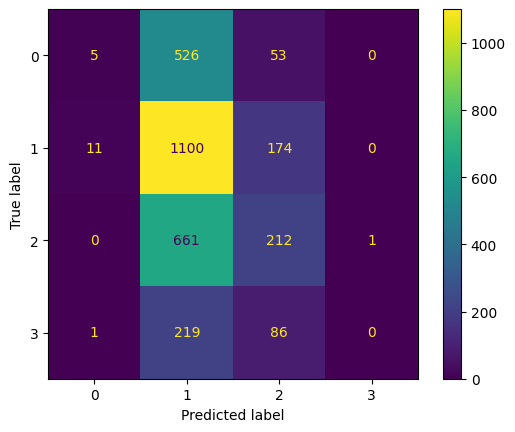

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2409


In [69]:
print_evaluation_metrics(rf_age_group, x_test, y_age_group_test, "Random Forest",
                         accuracy, training_accuracy, recall, precision, f1_val, "age_group", multiclass=True)

#### Age group prediction - XG Boost

In [70]:
# Base XG Boost Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, xgb_age_group_1 = xg_boost(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted")

In [71]:
xgb_age_group_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.4066907182682847
Age Group Model training Accuracy: 0.6447206359870116
Age Group Model Precision: 0.36520706678402176
Age Group Model Recall: 0.4066907182682847
Age Group Model F1 Score: 0.36093892669214733
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

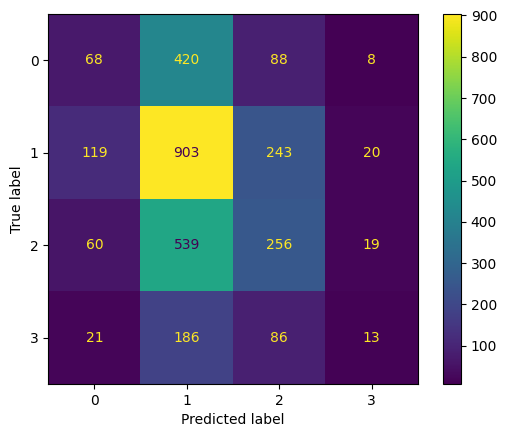

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.3317


In [72]:
print_evaluation_metrics(xgb_age_group_1, x_test, y_age_group_test, "XG Boost",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

### Age Group Prediction - XG Boost Hyperparameter Tuning

In [73]:
param_grids = [
    {
        "n_estimators": [10, 20],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20, 30],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20],
        "max_depth": [2, 4],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [10, 20],
        "max_depth": [4, 5],
        "learning_rate": [0.3, 0.4],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20, 50],
        "max_depth": [4, 5],
        "learning_rate": [0.3, 0.4],
        "min_child_weight": [2, 3],
        "gamma": [0.2, 0.3],
    },
]

In [74]:
best_accuracy = 0
best_params_age_group = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_age_group_train, x_test, y_age_group_test, xgb_age_group_1, param_grid)
    print("age_group Model Accuracy:", accuracy)
    print("age_group Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_age_group = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_age_group)

--------------------  Param Set  0 --------------------
{'n_estimators': [10, 20], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
age_group Model Accuracy: 0.42636930141029844
age_group Model training Accuracy: 0.452916806628597
Best CV Score: 0.4339939536446087
Best Paramater: {'gamma': 0.2, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 20}
--------------------  Param Set  1 --------------------
{'n_estimators': [20, 30], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
age_group Model Accuracy: 0.42735323056739916
age_group Model training Accuracy: 0.4491098421229426
Best CV Score: 0.43511364908744826
Best Paramater: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 30}
--------------------  Param Set  2 --------------------
{'n_estimators': [20], 'max_depth': [2, 4], 'learning_rate': [0.1, 0.3], 'min_child_weig

In [75]:
# Best XG Boost Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, xgb_age_group = xg_boost(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted", **best_params_age_group)


In [76]:
xgb_age_group

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.43096097081010165
Age Group Model training Accuracy: 0.4428395476430411
Age Group Model Precision: 0.34053173939266634
Age Group Model Recall: 0.43096097081010165
Age Group Model F1 Score: 0.3187639421739321
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

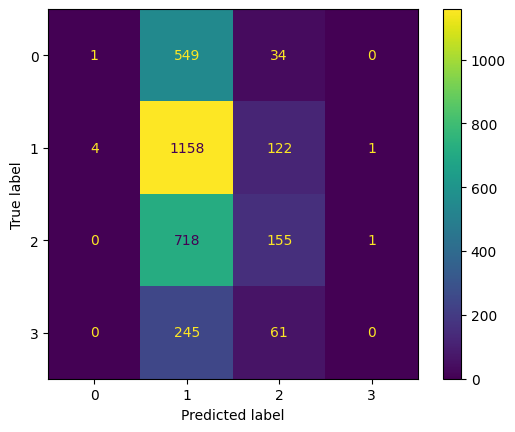

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2401


In [77]:
print_evaluation_metrics(xgb_age_group, x_test, y_age_group_test, "XG Boost",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

#### Age Group Prediction - Model Stacking

##### Age Group Prediction - Model 1

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [78]:
classifiers = [lr_age_group, rf_age_group]

y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_age_group_1 = model_stacking(x_train, y_age_group_train, x_test, y_age_group_test, classifiers, xgb_age_group, average='weighted')

In [79]:
stacking_age_group_1

StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                     solver='liblinear'),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=3,
                                                         n_estimators=120,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=XGBClassifier(base_score=None,
                                                   booster=None, callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytre...
                                                   importance_type=None,
                                                   interaction_constraints=None,
                                                   learning_rate=0.3,
                                                   max_bin=None,
                                                   max_cat_threshold=None,
                                                   max_cat_to_onehot=None,
                                                   max_delta_step=None,
                                                   max_depth=2, max_leaves=None,
                                                   min_child_weight=2,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   multi_strategy=None,
                                                   n_estimators=20, n_jobs=None,
                                                   num_parallel_tree=None,
                                                   objective='multi:softprob', ...),
                     use_probas=True)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.4286651361102001
Age Group Model training Accuracy: 0.4363453140745717
Age Group Model Precision: 0.2961207049502692
Age Group Model Recall: 0.4286651361102001
Age Group Model F1 Score: 0.31573830767419137
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

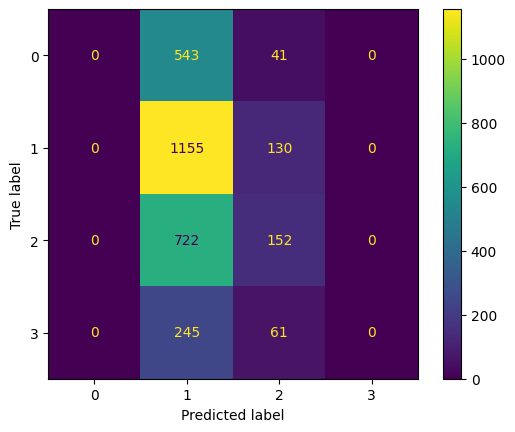

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2416


In [80]:
print_evaluation_metrics(stacking_age_group_1, x_test, y_age_group_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

##### Age Group Prediction - Model 2

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [81]:
classifiers = [xgb_age_group, rf_age_group]

y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_age_group_2 = model_stacking(x_train, y_age_group_train, x_test, y_age_group_test, classifiers, lr_age_group, average='weighted')

In [82]:
stacking_age_group_2

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=...
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=20, n_jobs=None,
                                                num_parallel_tree=None,
                                                objective='multi:softprob', ...),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=3,
                                                         n_estimators=120,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=LogisticRegression(penalty='l1',
                                                        solver='liblinear'),
                     use_probas=True)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.4283371597244998
Age Group Model training Accuracy: 0.4426156085544732
Age Group Model Precision: 0.2966022166294495
Age Group Model Recall: 0.4283371597244998
Age Group Model F1 Score: 0.31793225526558117
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

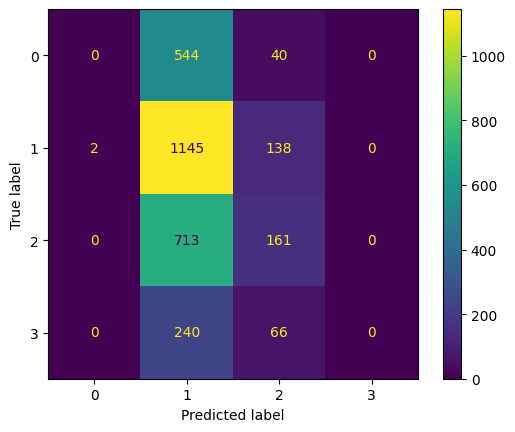

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2395


In [83]:
print_evaluation_metrics(stacking_age_group_2, x_test, y_age_group_test, "Stacking",
                   accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

##### Age Group Prediction - Model 3

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [84]:
classifiers = [lr_age_group, xgb_age_group]
y_prediction, accuracy, training_accuracy,recall, precision, f1_val, stacking_age_group_3 = model_stacking(x_train, y_age_group_train, x_test, y_age_group_test, classifiers, rf_age_group, average='weighted')

In [85]:
stacking_age_group_3

StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                     solver='liblinear'),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                grow_policy=None,
                                                importance_t...
                                                max_depth=2, max_leaves=None,
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=20, n_jobs=None,
                                                num_parallel_tree=None,
                                                objective='multi:softprob', ...)],
                     cv=3,
                     meta_classifier=RandomForestClassifier(max_depth=50,
                                                            max_leaf_nodes=100,
                                                            min_samples_leaf=3,
                                                            n_estimators=120,
                                                            oob_score=True,
                                                            random_state=100),
                     use_probas=True)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.4201377500819941
Age Group Model training Accuracy: 0.44552681670585603
Age Group Model Precision: 0.3712997247057213
Age Group Model Recall: 0.4201377500819941
Age Group Model F1 Score: 0.3272794501630152
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

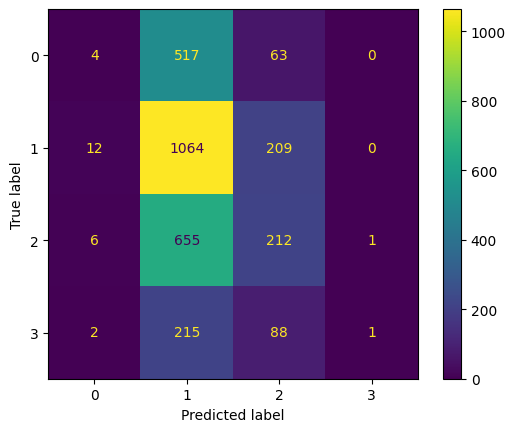

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 1.2466


In [86]:
print_evaluation_metrics(stacking_age_group_3, x_test, y_age_group_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

In [87]:
# Since Model 2 gives best accuracy of 0.432928829124303, considering it is best Stacking Model

stacking_age_group = stacking_age_group_2

#### Age Group Prediction - Final Model Selection

For the final model from the logistic regression, random forest, XG Boost & Stacking model the accuracy obtained are:

1. logistic regression - `0.43555264020990486`
2. random forest - `0.4312889471958019`
3. XG Boost - `0.44743029895868325`
4. Stacking - `0.432928829124303`

From the above 4, we see that XG Boost has the highest accuracy, so we will use XG Boost for the gender prediction

In [88]:
final_model_age_group = xgb_age_group
final_model_age_group

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

We wil now export this model for age group prediction in our Flask applicatio 

In [89]:
pickle.dump(final_model_age_group, open("models/model_age_group.pkl","wb"))

## SCENARIO 2 - Devices without events and location

We will first do the data set preparation in this case

In [90]:
train_df = device_without_location_train_test_merged_df[device_without_location_train_test_merged_df["train_test_flag"]=="train"]
test_df = device_without_location_train_test_merged_df[device_without_location_train_test_merged_df["train_test_flag"]=="test"]

In [91]:
train_df

,device_id,gender,age,age_group,phone_brand,device_model,train_test_flag
0,398514470209561000,1,68,3,0.664493,0.664430,train
1,-3073918292047050000,1,27,1,0.664493,0.706468,train
2,5805880616488060000,1,39,2,0.689542,0.692912,train
3,-2403560729305410000,1,25,1,0.681667,0.720682,train
4,-1889893391998300000,1,22,0,0.664493,0.673285,train
...,...,...,...,...,...,...,...
41062,-1439729875487580000,0,14,0,0.664493,0.664430,train
41063,-6052522297875340000,1,17,0,0.659613,0.718324,train
41064,-3585655385248180000,1,24,0,0.664493,0.688235,train
41065,-5933719272299020000,0,21,0,0.668285,0.480675,train


In [92]:
x_train = train_df.drop(["age_group", "gender", "device_id", "train_test_flag"],axis=1)
x_test = test_df.drop(["age_group", "gender", "device_id", "train_test_flag"],axis=1)

y_gender_train = train_df["gender"]
y_gender_test = test_df["gender"]

### Gender Prediction

#### Gender Prediction - Logistic Regression

In [93]:
# With L2 (Ridge regression)
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_gender_1 = logistic_regression(x_train, y_gender_train, x_test, y_gender_test)

In [94]:
lr_gender_1

LogisticRegression()

---------------Model Statistics---------------
Gender Model Accuracy: 0.6449162446435528
Gender Model training Accuracy: 0.6451165169113887
Gender Model Precision: 0.6564330657409416
Gender Model Recall: 0.926646248085758
Gender Model F1 Score: 0.7684785369570739
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

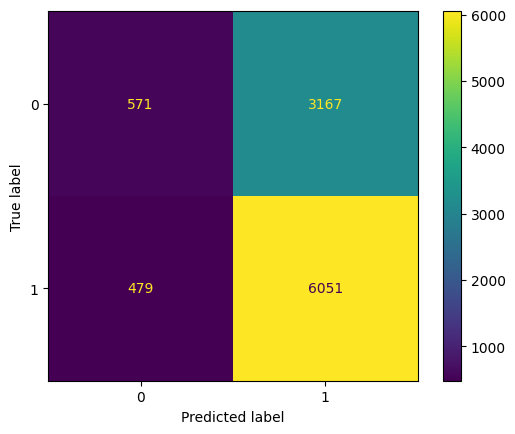

---------------Decile Analysis---------------
Top Probability: 0.21700541855516045
Bottom Probability: 0.8781156935991269
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6296486684905737


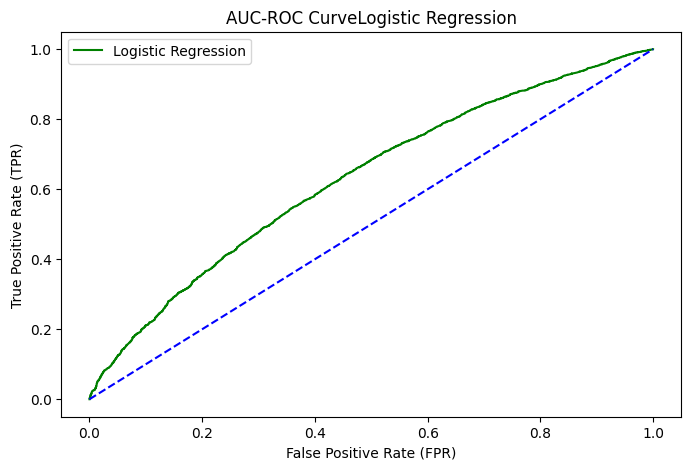

In [95]:
print_evaluation_metrics(lr_gender_1, x_test, y_gender_test, "Logistic Regression",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

In [96]:
# With L1 (Lasso) regularisation
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_gender_2 = logistic_regression(x_train, y_gender_train, x_test, y_gender_test,penalty='l1', solver='liblinear')

In [97]:
lr_gender_2

LogisticRegression(penalty='l1', solver='liblinear')

---------------Model Statistics---------------
Gender Model Accuracy: 0.6447214647448384
Gender Model training Accuracy: 0.6451652178147904
Gender Model Precision: 0.6566304347826087
Gender Model Recall: 0.925114854517611
Gender Model F1 Score: 0.76808645899555
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

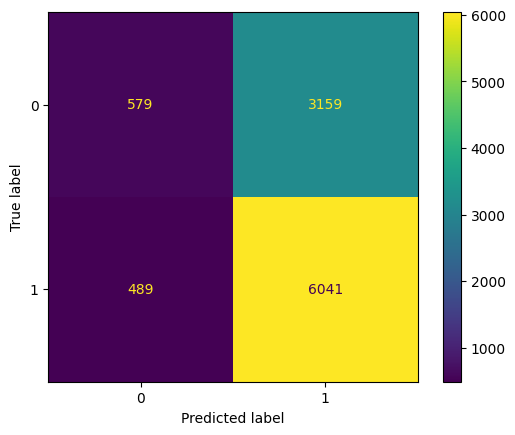

---------------Decile Analysis---------------
Top Probability: 0.21306608965300336
Bottom Probability: 0.8825636560239198
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6296625157625382


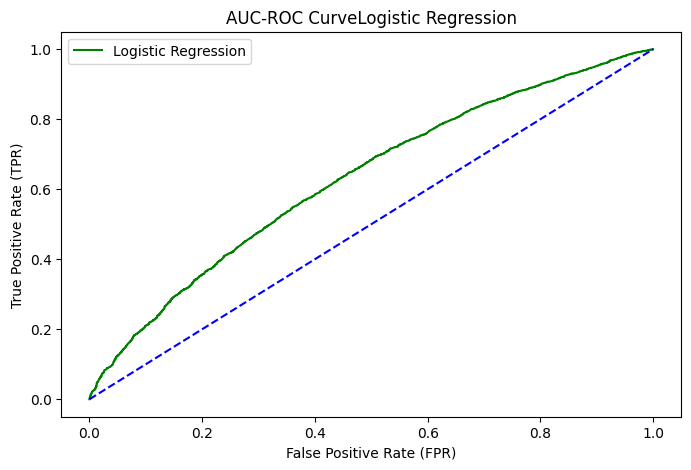

In [98]:
print_evaluation_metrics(lr_gender_2, x_test, y_gender_test, "Logistic Regression",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

In [99]:
# Since second model gives better accuracy of `0.6450136345929101`, making first model as final logistic regression model
lr_gender = lr_gender_2

#### Gender Prediction - Random Forest Classifier

In [100]:
# Base Random Forest Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, rf_gender_base = random_forest(x_train, y_gender_train, x_test, y_gender_test)

In [101]:
rf_gender_base

RandomForestClassifier(random_state=100)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6331320607713284
Gender Model training Accuracy: 0.7631918572089512
Gender Model Precision: 0.675339510090113
Gender Model Recall: 0.814854517611026
Gender Model F1 Score: 0.7385661739190783
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

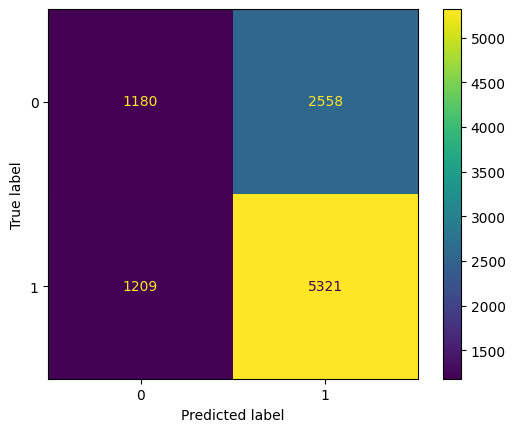

---------------Decile Analysis---------------
Top Probability: 0.0
Bottom Probability: 1.0
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.609564019871245


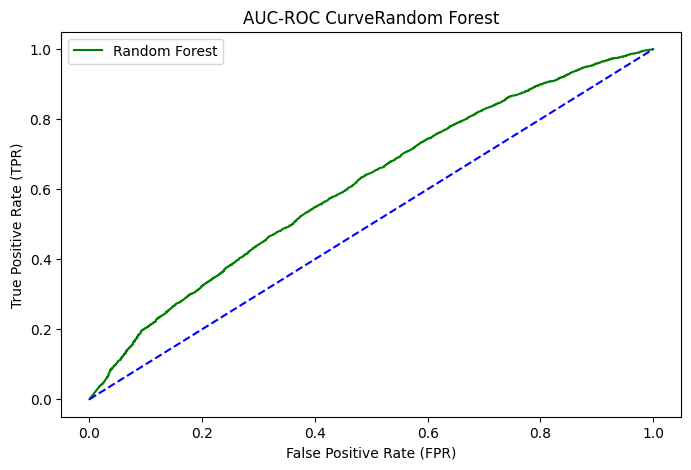

In [102]:
print_evaluation_metrics(rf_gender_base, x_test, y_gender_test, "Random Forest",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

##### Gender Prediction - Random Forest Hyperparameter Tuning

In [103]:
param_grids = [
    {
        "n_estimators": [120, 130],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [100, 120],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [120, 130],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [120],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [130],
        "max_depth": [20, 50],
        "oob_score": [True],
        "bootstrap": [True],
    },
]

In [104]:
best_accuracy = 0
best_params_gender = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_gender_train, x_test, y_gender_test, rf_gender_base, param_grid)
    print("Gender Model Accuracy:", accuracy)
    print("Gender Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_gender = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_gender)

--------------------  Param Set  0 --------------------
{'n_estimators': [120, 130], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [100, 120], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
Gender Model Accuracy: 0.6528048305414881
Gender Model training Accuracy: 0.6628923466530304
Best CV Score: 0.6509849757713005
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 130, 'oob_score': True}
--------------------  Param Set  1 --------------------
{'n_estimators': [100, 120], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [120, 130], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
Gender Model Accuracy: 0.6518309310479159
Gender Model training Accuracy: 0.6646699296271946
Best CV Score: 0.6506197189957875
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 120, 'min_samples_leaf': 3, 'min_samples_split

##### Gender Prediction - Random Forest - Best Parameters

In [105]:
# Best Random Forest Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, rf_gender = random_forest(x_train, y_gender_train, x_test, y_gender_test, **best_params_gender)

In [106]:
rf_gender

RandomForestClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=3,
                       n_estimators=130, oob_score=True, random_state=100)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6528048305414881
Gender Model training Accuracy: 0.6628923466530304
Gender Model Precision: 0.6583021890016018
Gender Model Recall: 0.944104134762634
Gender Model F1 Score: 0.7757156338471217
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

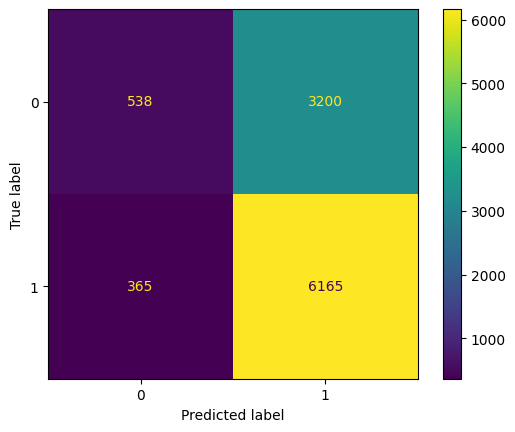

---------------Decile Analysis---------------
Top Probability: 0.19478356263728314
Bottom Probability: 0.82776371095483
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6377691717119078


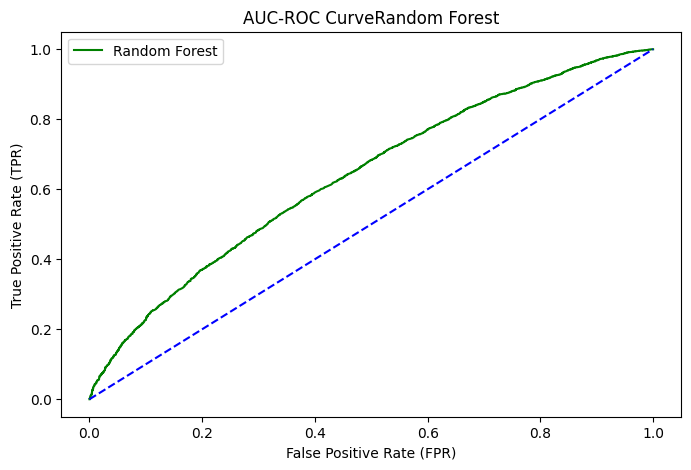

In [107]:
print_evaluation_metrics(rf_gender, x_test, y_gender_test, "Random Forest",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

#### Gender Prediction - XG Boost

In [108]:
# Base XG Boost Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, xgb_gender_base = xg_boost(x_train, y_gender_train, x_test, y_gender_test)

In [109]:
xgb_gender_base

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6488118426178419
Gender Model training Accuracy: 0.6837850342123847
Gender Model Precision: 0.6629514043691485
Gender Model Recall: 0.9108728943338438
Gender Model F1 Score: 0.7673848535672816
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

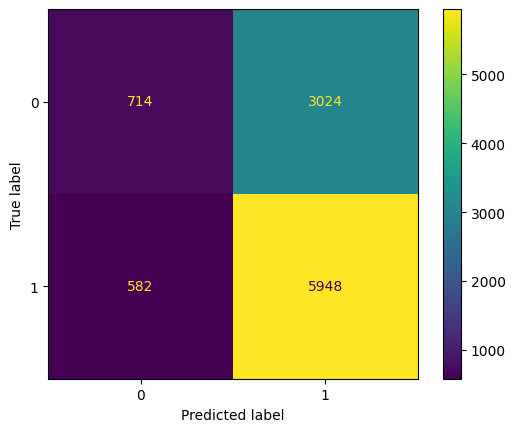

---------------Decile Analysis---------------
Top Probability: 0.0046360423
Bottom Probability: 0.977409
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6301985649637799


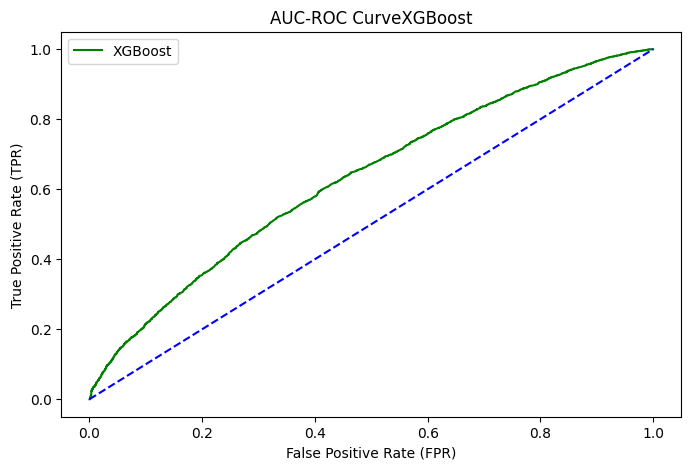

In [110]:
print_evaluation_metrics(xgb_gender_base, x_test, y_gender_test, "XGBoost",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

##### Gender Prediction - XG Boost Hyperparameter Tuning

In [111]:
param_grids = [
    {
        "n_estimators": [10, 20],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [10, 20],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [3, 5],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20],
        "max_depth": [6, 8],
        "learning_rate": [0.3, 0.4],
        "min_child_weight": [2, 3],
        "gamma": [0.2, 0.3],
    },
]

In [112]:
best_accuracy = 0
best_params_gender = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_gender_train, x_test, y_gender_test, xgb_gender_base, param_grid)
    print("Gender Model Accuracy:", accuracy)
    print("Gender Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_gender = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_gender)

--------------------  Param Set  0 --------------------
{'n_estimators': [10, 20], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
Gender Model Accuracy: 0.6513439813011297
Gender Model training Accuracy: 0.6570238877931186
Best CV Score: 0.6504005649304795
Best Paramater: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 20}
--------------------  Param Set  1 --------------------
{'n_estimators': [10, 20], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [3, 5], 'gamma': [0.1, 0.2]}
Gender Model Accuracy: 0.6521231008959876
Gender Model training Accuracy: 0.6586066671536757
Best CV Score: 0.6503762144787785
Best Paramater: {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 10}
--------------------  Param Set  2 --------------------
{'n_estimators': [20], 'max_depth': [6, 8], 'learning_rate': [0.3, 0.4], 'min_child_weight': [2, 3], '

In [113]:
# Best XG Boost Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, xgb_gender = xg_boost(x_train, y_gender_train, x_test, y_gender_test, **best_params_gender)

In [114]:
xgb_gender

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6521231008959876
Gender Model training Accuracy: 0.6586066671536757
Gender Model Precision: 0.6624203821656051
Gender Model Recall: 0.9237366003062787
Gender Model F1 Score: 0.7715528268099258
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

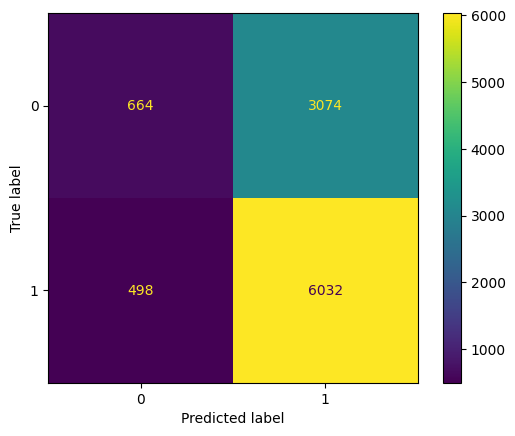

---------------Decile Analysis---------------
Top Probability: 0.11607185
Bottom Probability: 0.89564514
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6380504188185245


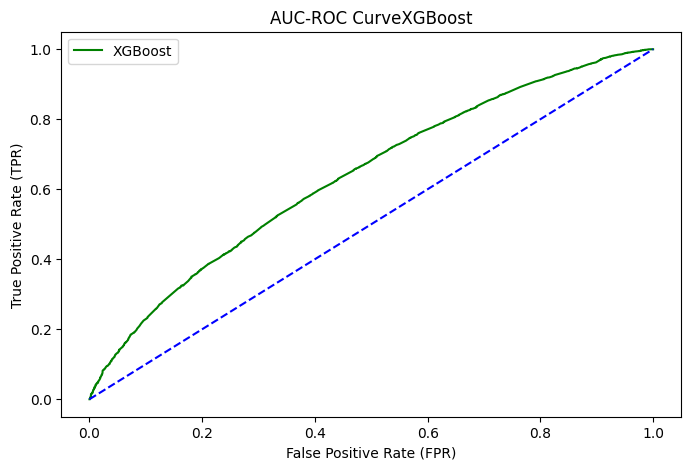

In [115]:
print_evaluation_metrics(xgb_gender, x_test, y_gender_test, "XGBoost",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

#### Gender Prediction - Model Stacking

##### Gender Prediction - Model Stacking - 1

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [116]:
classifiers = [lr_gender, rf_gender]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_gender_1 = model_stacking(x_train, y_gender_train, x_test, y_gender_test, classifiers, xgb_gender)

In [117]:
stacking_gender_1

StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                     solver='liblinear'),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=3,
                                                         n_estimators=130,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=XGBClassifier(base_score=None,
                                                   booster=None, callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytre...
                                                   gamma=0.1, grow_policy=None,
                                                   importance_type=None,
                                                   interaction_constraints=None,
                                                   learning_rate=0.3,
                                                   max_bin=None,
                                                   max_cat_threshold=None,
                                                   max_cat_to_onehot=None,
                                                   max_delta_step=None,
                                                   max_depth=6, max_leaves=None,
                                                   min_child_weight=5,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   multi_strategy=None,
                                                   n_estimators=10, n_jobs=None,
                                                   num_parallel_tree=None,
                                                   random_state=100, ...),
                     use_probas=True)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6488118426178419
Gender Model training Accuracy: 0.6600189933523267
Gender Model Precision: 0.659432933478735
Gender Model Recall: 0.9260336906584993
Gender Model F1 Score: 0.7703184713375796
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

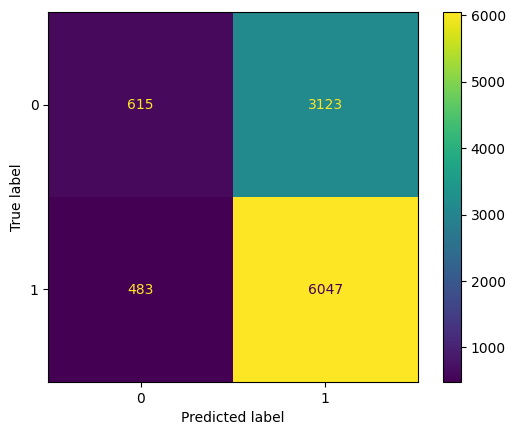

---------------Decile Analysis---------------
Top Probability: 0.08018052
Bottom Probability: 0.95587665
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6314461918773051


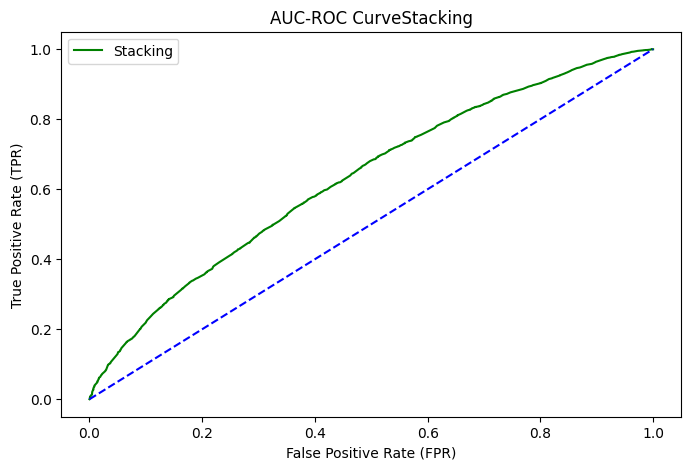

In [118]:
print_evaluation_metrics(stacking_gender_1, x_test, y_gender_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

##### Gender Prediction - Model Stacking - 2

In this case we will be stacking XGBoost and random forest as classifier and XGBoost as Logistic regression Meta classifier

In [119]:
classifiers = [xgb_gender, rf_gender]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_gender_2 = model_stacking(x_train, y_gender_train, x_test, y_gender_test, classifiers, lr_gender)

In [120]:
stacking_gender_2

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=...
                                                min_child_weight=5, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=10, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=100, ...),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=3,
                                                         n_estimators=130,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=LogisticRegression(penalty='l1',
                                                        solver='liblinear'),
                     use_probas=True)

---------------Model Statistics---------------
Gender Model Accuracy: 0.651928320997273
Gender Model training Accuracy: 0.6622348844571067
Gender Model Precision: 0.6628829623098964
Gender Model Recall: 0.9211332312404288
Gender Model F1 Score: 0.7709561650858754
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

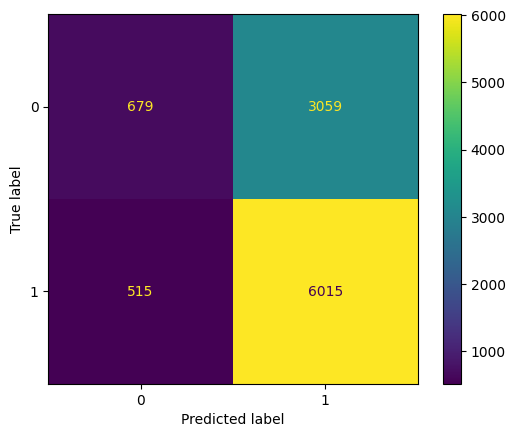

---------------Decile Analysis---------------
Top Probability: 0.17696432273387683
Bottom Probability: 0.8256279804158223
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6383774684401007


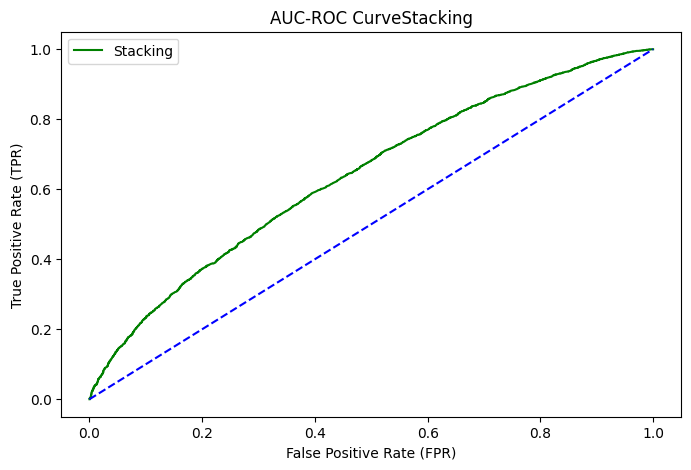

In [121]:
print_evaluation_metrics(stacking_gender_2, x_test, y_gender_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

##### Gender Prediction - Model Stacking - 3

In this case we will be stacking XGBoost and Logistic regression as classifier and XGBoost as Random Forest Meta classifier

In [122]:
classifiers = [lr_gender, xgb_gender]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_gender_3 = model_stacking(x_train, y_gender_train, x_test, y_gender_test, classifiers, rf_gender)

In [123]:
stacking_gender_3

StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                     solver='liblinear'),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                grow_policy=None,
                                                importance_t...
                                                max_delta_step=None,
                                                max_depth=6, max_leaves=None,
                                                min_child_weight=5, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=10, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=100, ...)],
                     cv=3,
                     meta_classifier=RandomForestClassifier(max_depth=50,
                                                            max_leaf_nodes=100,
                                                            min_samples_leaf=3,
                                                            n_estimators=130,
                                                            oob_score=True,
                                                            random_state=100),
                     use_probas=True)

---------------Model Statistics---------------
Gender Model Accuracy: 0.6502726918582002
Gender Model training Accuracy: 0.655514159787664
Gender Model Precision: 0.6641349268401653
Gender Model Recall: 0.9105666156202143
Gender Model F1 Score: 0.7680682038364658
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

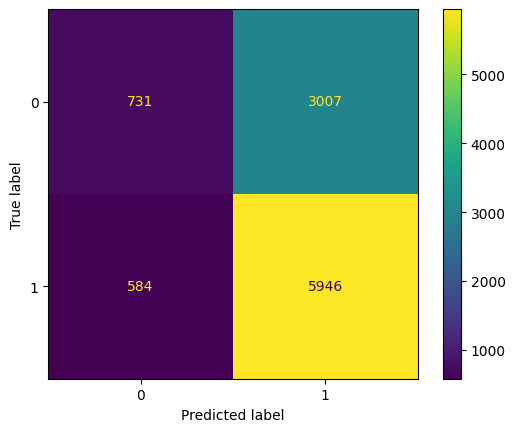

---------------Decile Analysis---------------
Top Probability: 0.10154455169099363
Bottom Probability: 0.878895417582719
KS Statistic
Decile 0: 0.0032159264931087284
Decile 1: 0.003062787136294015
Decile 2: 0.003215926493108756
Decile 3: 0.00245022970903519
Decile 4: 0.0033690658499234694
Decile 5: 0.000612557427258853
Decile 6: 0.0004594180704440287
Decile 7: 0.0013782542113323082
Decile 8: 0.001990811638591161
Decile 9: 0.0007656967840734552
---------------ROC Curve---------------
ROC Area Under Curve SCORE ->  0.6353970275069092


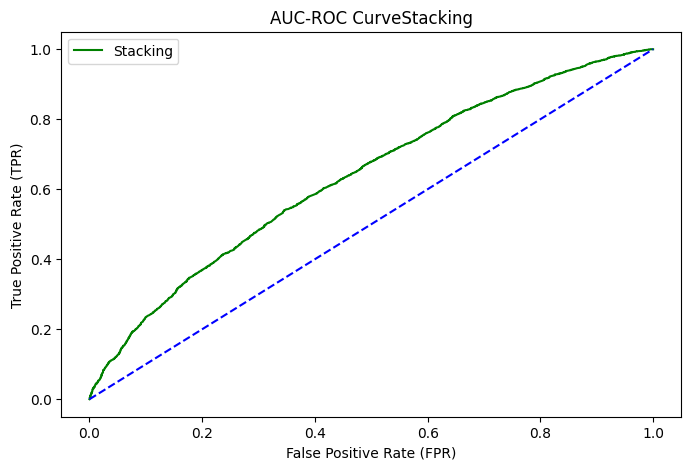

In [124]:
print_evaluation_metrics(stacking_gender_3, x_test, y_gender_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Gender")

In [125]:
# Since Stacking model 3 has the highest accuracy we will chose this as our final stacking model
stacking_gender = stacking_gender_3

#### Gender Prediction - Final Model Selection

- LR - 0.6450136345929101
- RF - 0.6528048305414881
- XGB - 0.6521231008959876
- Stacking - 0.654460459680561

so we will chose the stacking gender model

In [126]:
final_model_gender = stacking_gender

### Age Group Prediction

#### Dataset preparation

We have done the target encoding of data for gender, before we start the prediction we will first re-number the data for a new target

In [127]:
train_df.head()

,device_id,gender,age,age_group,phone_brand,device_model,train_test_flag
0,398514470209561000,1,68,3,0.664493,0.664430,train
1,-3073918292047050000,1,27,1,0.664493,0.706468,train
2,5805880616488060000,1,39,2,0.689542,0.692912,train
3,-2403560729305410000,1,25,1,0.681667,0.720682,train
4,-1889893391998300000,1,22,0,0.664493,0.673285,train


In [128]:
#target encoding
target_columns = ['age_group']

cat_columns = ["phone_brand", "device_model"]
encoder = category_encoders.TargetEncoder(cols=cat_columns)

encoder.fit(train_df, train_df["age_group"])

train_df = encoder.transform(train_df)
test_df = encoder.transform(test_df)

x_train = train_df.drop(["age_group", "gender", "device_id", "train_test_flag"], axis=1)
x_test = test_df.drop(["age_group", "gender", "device_id", "train_test_flag"], axis=1)

y_age_group_train = train_df["age_group"]

y_age_group_test = test_df["age_group"]

#### Age Group Prediction - Logistic Regression

In [129]:
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_age_group_1 = logistic_regression(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted")

In [130]:
lr_age_group_1

LogisticRegression()

---------------Model Statistics---------------
Age Group Model Accuracy: 0.983638488507986
Age Group Model training Accuracy: 0.9851462244624638
Age Group Model Precision: 0.9836622713773052
Age Group Model Recall: 0.983638488507986
Age Group Model F1 Score: 0.9836417774290472
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

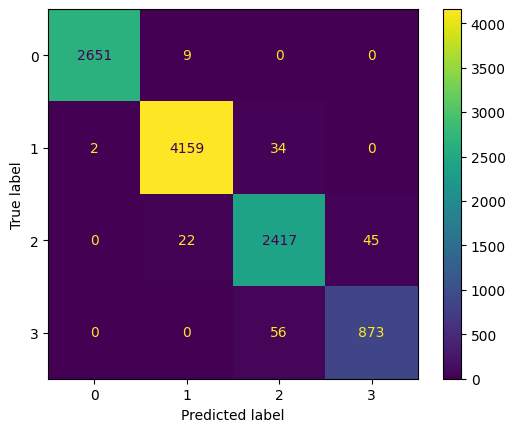

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.0470


In [131]:
print_evaluation_metrics(lr_age_group_1, x_test, y_age_group_test, "Logistic Regression",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

In [132]:
#Applying L1 Regularization
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, lr_age_group_2 = logistic_regression(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted", penalty='l1', solver='liblinear')

In [133]:
lr_age_group_2

LogisticRegression(penalty='l1', solver='liblinear')

---------------Model Statistics---------------
Age Group Model Accuracy: 0.8750486949746786
Age Group Model training Accuracy: 0.8769084666520564
Age Group Model Precision: 0.9040099107834002
Age Group Model Recall: 0.8750486949746786
Age Group Model F1 Score: 0.8615691262910325
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

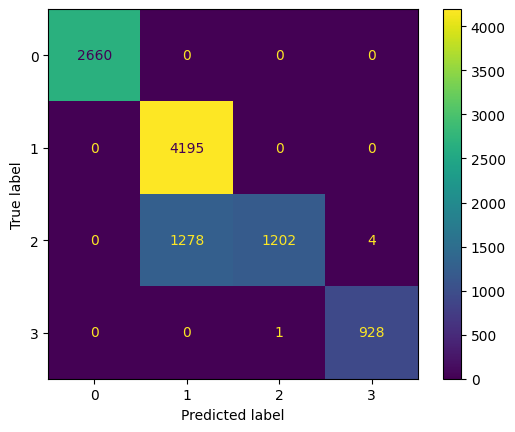

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.5272


In [134]:
print_evaluation_metrics(lr_age_group_2, x_test, y_age_group_test, "Logistic Regression",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

In [135]:
# Since first model gives better accuracy, making first model as final logistic regression model

lr_age_group = lr_age_group_1

#### Age Group Prediction - Random Forest Classifier

In [136]:
# Base Random Forest Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, rf_age_group_1 = random_forest(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted")

In [137]:
rf_age_group_1

RandomForestClassifier(random_state=100)

---------------Model Statistics---------------
age_group Model Accuracy: 1.0
age_group Model training Accuracy: 1.0
age_group Model Precision: 1.0
age_group Model Recall: 1.0
age_group Model F1 Score: 1.0
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

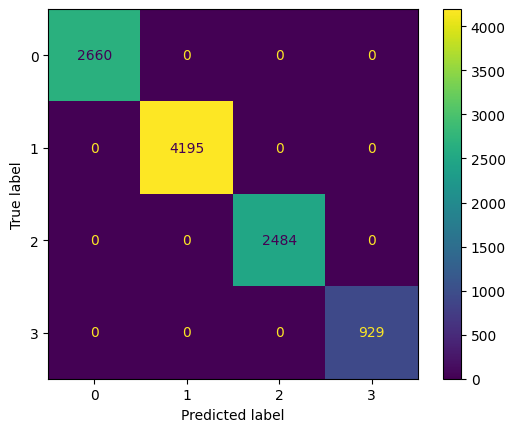

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.0028


In [138]:
print_evaluation_metrics(rf_age_group_1, x_test, y_age_group_test, "Random Forest",
                         accuracy, training_accuracy, recall, precision, f1_val, "age_group", multiclass=True)

##### Age Group Prediction - Random Forest Hyperparameter Tuning

In [139]:
param_grids = [
    {
        "n_estimators": [120, 130],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100, 120],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [130, 140],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [80, 100],
        "max_depth": [50],
        "oob_score": [True],
        "bootstrap": [True],
    },
    {
        "n_estimators": [130],
        "min_samples_split": [2, 3],
        "min_samples_leaf": [3, 5],
        "max_leaf_nodes": [100],
        "max_depth": [50, 80],
        "oob_score": [True],
        "bootstrap": [True],
    },
]

In [140]:
best_accuracy = 0
best_params_age_group = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_age_group_train, x_test, y_age_group_test, rf_age_group_1, param_grid)
    print("age_group Model Accuracy:", accuracy)
    print("age_group Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_age_group = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_age_group)

--------------------  Param Set  0 --------------------
{'n_estimators': [120, 130], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [100, 120], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
age_group Model Accuracy: 1.0
age_group Model training Accuracy: 1.0
Best CV Score: 1.0
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 100, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 120, 'oob_score': True}
--------------------  Param Set  1 --------------------
{'n_estimators': [130, 140], 'min_samples_split': [2, 3], 'min_samples_leaf': [3, 5], 'max_leaf_nodes': [80, 100], 'max_depth': [50], 'oob_score': [True], 'bootstrap': [True]}
age_group Model Accuracy: 1.0
age_group Model training Accuracy: 1.0
Best CV Score: 1.0
Best Paramater: {'bootstrap': True, 'max_depth': 50, 'max_leaf_nodes': 80, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 130, 'oob_score': True}
--------------------  Param Set  2

##### Age Group Prediction - Random Forest - Best Parameters

In [141]:
#Best Random Forest Model
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, rf_age_group = random_forest(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted", **best_params_age_group)

In [142]:
rf_age_group

RandomForestClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=3,
                       n_estimators=120, oob_score=True, random_state=100)

---------------Model Statistics---------------
age_group Model Accuracy: 1.0
age_group Model training Accuracy: 1.0
age_group Model Precision: 1.0
age_group Model Recall: 1.0
age_group Model F1 Score: 1.0
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

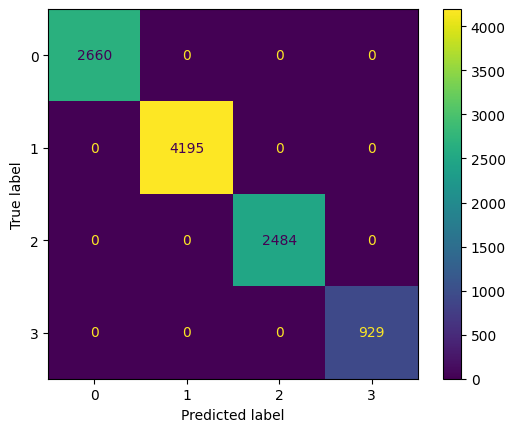

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.0731


In [143]:
print_evaluation_metrics(rf_age_group, x_test, y_age_group_test, "Random Forest",
                         accuracy, training_accuracy, recall,precision, f1_val, "age_group", multiclass=True)

#### Age Group Prediction - XG Boost

In [144]:
# Base XG Boost Model
y_prediction ,accuracy ,training_accuracy ,recall ,precision ,f1_val, xgb_age_group_1 = xg_boost(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted")

In [145]:
xgb_age_group_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

---------------Model Statistics---------------
Age Group Model Accuracy: 1.0
Age Group Model training Accuracy: 1.0
Age Group Model Precision: 1.0
Age Group Model Recall: 1.0
Age Group Model F1 Score: 1.0
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

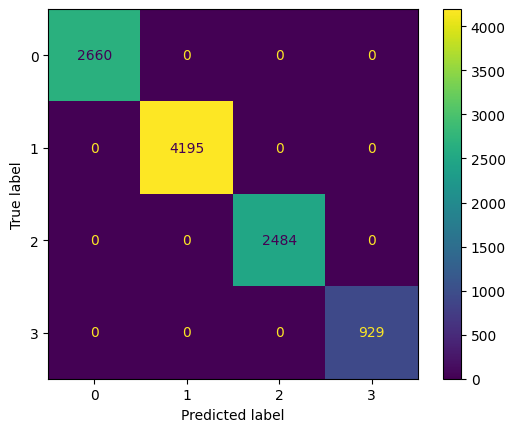

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.0001


In [146]:
print_evaluation_metrics(xgb_age_group_1, x_test, y_age_group_test, "XG Boost",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

##### Age Group Prediction - XG Boost Hyperparameter Tuning

In [147]:
param_grids = [
    {
        "n_estimators": [10, 20],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [10, 20],
        "max_depth": [6, 9],
        "learning_rate": [0.3, 0.5],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
    {
        "n_estimators": [20],
        "max_depth": [2, 4],
        "learning_rate": [0.1, 0.3],
        "min_child_weight": [2, 3],
        "gamma": [0.1, 0.2],
    },
]

In [148]:
best_accuracy = 0
best_params_age_group = {}
for i, param_grid in enumerate(param_grids):
    print("--------------------  Param Set ", i, "--------------------" )
    print(param_grid)
    y_prediction, accuracy, training_accuracy, cv, best_score, best_params_i = cross_validation(x_train, y_age_group_train, x_test, y_age_group_test, xgb_age_group_1, param_grid)
    print("age_group Model Accuracy:", accuracy)
    print("age_group Model training Accuracy:", training_accuracy)
    print("Best CV Score:", best_score)
    print("Best Paramater:", best_params_i)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_age_group = best_params_i

print("\n ------------- \n")
print("After evaluating the 5 set of hyper parameters, the best accuracy is : ", best_accuracy)
print("set of params is : ", best_params_age_group)

--------------------  Param Set  0 --------------------
{'n_estimators': [10, 20], 'max_depth': [3, 6], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
age_group Model Accuracy: 1.0
age_group Model training Accuracy: 1.0
Best CV Score: 1.0
Best Paramater: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 10}
--------------------  Param Set  1 --------------------
{'n_estimators': [10, 20], 'max_depth': [6, 9], 'learning_rate': [0.3, 0.5], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
age_group Model Accuracy: 1.0
age_group Model training Accuracy: 1.0
Best CV Score: 1.0
Best Paramater: {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 10}
--------------------  Param Set  2 --------------------
{'n_estimators': [20], 'max_depth': [2, 4], 'learning_rate': [0.1, 0.3], 'min_child_weight': [2, 3], 'gamma': [0.1, 0.2]}
age_group Model Accuracy: 1.0
age_group Model training Acc

In [149]:
# Best XG Boost Model

y_prediction, accuracy, training_accuracy, recall, precision, f1_val, xgb_age_group = xg_boost(x_train, y_age_group_train, x_test, y_age_group_test, average="weighted", **best_params_age_group)

In [150]:
xgb_age_group

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

---------------Model Statistics---------------
Age Group Model Accuracy: 1.0
Age Group Model training Accuracy: 1.0
Age Group Model Precision: 1.0
Age Group Model Recall: 1.0
Age Group Model F1 Score: 1.0
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

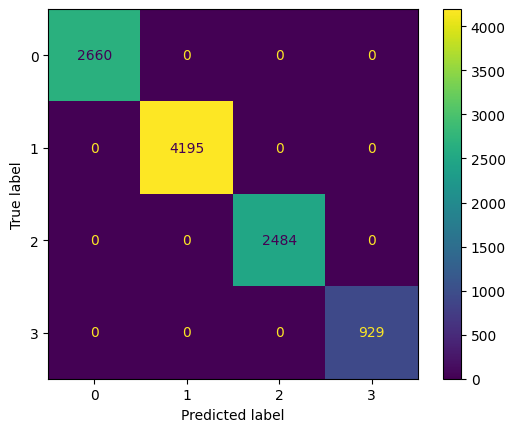

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.4032


In [151]:
print_evaluation_metrics(xgb_age_group, x_test, y_age_group_test, "XG Boost",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

#### Age Group Prediction - Model Stacking

##### Age Group Prediction - Model 1

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [152]:
classifiers = [lr_age_group, rf_age_group]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_age_group_1 = model_stacking(x_train, y_age_group_train, x_test, y_age_group_test, classifiers, xgb_age_group, average='weighted')

In [153]:
stacking_age_group_1

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=3,
                                                         n_estimators=120,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3,
                     meta_classifier=XGBClassifier(base_score=None,
                                                   booster=None, callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytree=None,
                                                   device=None,
                                                   early_stoppi...
                                                   importance_type=None,
                                                   interaction_constraints=None,
                                                   learning_rate=0.1,
                                                   max_bin=None,
                                                   max_cat_threshold=None,
                                                   max_cat_to_onehot=None,
                                                   max_delta_step=None,
                                                   max_depth=3, max_leaves=None,
                                                   min_child_weight=2,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   multi_strategy=None,
                                                   n_estimators=10, n_jobs=None,
                                                   num_parallel_tree=None,
                                                   objective='multi:softprob', ...),
                     use_probas=True)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.9992208804051422
Age Group Model training Accuracy: 0.9995616918693842
Age Group Model Precision: 0.9992221208007961
Age Group Model Recall: 0.9992208804051422
Age Group Model F1 Score: 0.9992207318538595
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

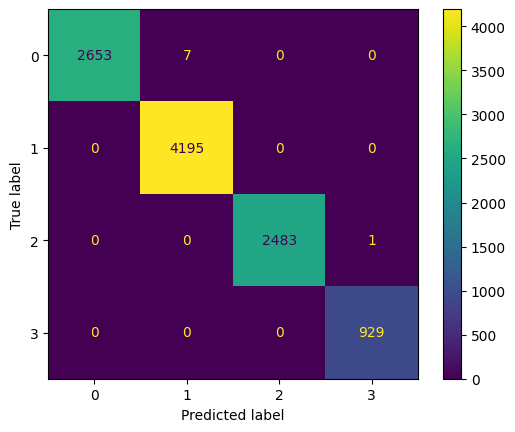

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.4128


In [154]:
print_evaluation_metrics(stacking_age_group_1, x_test, y_age_group_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

##### Age Group Prediction - Model 2

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [155]:
classifiers = [xgb_age_group, rf_age_group]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_age_group_2 = model_stacking(x_train, y_age_group_train, x_test, y_age_group_test, classifiers, lr_age_group, average='weighted')

In [156]:
stacking_age_group_2

StackingCVClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=...
                                                max_depth=3, max_leaves=None,
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=10, n_jobs=None,
                                                num_parallel_tree=None,
                                                objective='multi:softprob', ...),
                                  RandomForestClassifier(max_depth=50,
                                                         max_leaf_nodes=100,
                                                         min_samples_leaf=3,
                                                         n_estimators=120,
                                                         oob_score=True,
                                                         random_state=100)],
                     cv=3, meta_classifier=LogisticRegression(),
                     use_probas=True)

---------------Model Statistics---------------
Age Group Model Accuracy: 1.0
Age Group Model training Accuracy: 1.0
Age Group Model Precision: 1.0
Age Group Model Recall: 1.0
Age Group Model F1 Score: 1.0
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

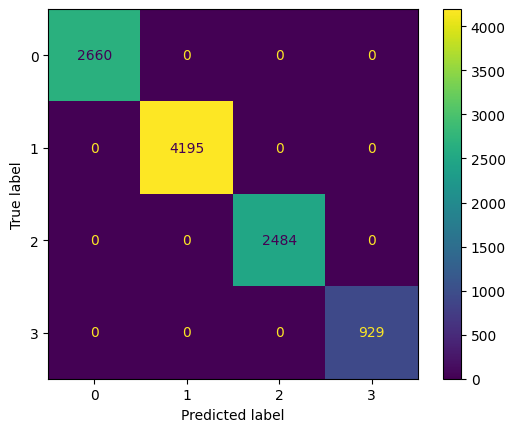

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.0007


In [157]:
print_evaluation_metrics(stacking_age_group_2, x_test, y_age_group_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

##### Age Group Prediction - Model 3

In this case we will be stacking Logistic regression and random forest as classifier and XGBoost as Meta classifier

In [158]:
classifiers = [lr_age_group, xgb_age_group]
y_prediction, accuracy, training_accuracy, recall, precision, f1_val, stacking_age_group_3 = model_stacking(x_train, y_age_group_train, x_test, y_age_group_test, classifiers, rf_age_group, average='weighted')

In [159]:
stacking_age_group_3

StackingCVClassifier(classifiers=[LogisticRegression(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraint...
                                                max_depth=3, max_leaves=None,
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=10, n_jobs=None,
                                                num_parallel_tree=None,
                                                objective='multi:softprob', ...)],
                     cv=3,
                     meta_classifier=RandomForestClassifier(max_depth=50,
                                                            max_leaf_nodes=100,
                                                            min_samples_leaf=3,
                                                            n_estimators=120,
                                                            oob_score=True,
                                                            random_state=100),
                     use_probas=True)

---------------Model Statistics---------------
Age Group Model Accuracy: 0.7388975457732762
Age Group Model training Accuracy: 0.7399371758346117
Age Group Model Precision: 0.5816459349015891
Age Group Model Recall: 0.7388975457732762
Age Group Model F1 Score: 0.6409794073628049
---------------Confusion Matrix---------------


<Figure size 800x500 with 0 Axes>

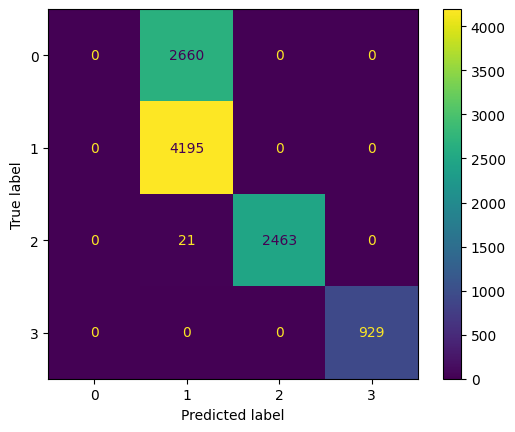

---------------Multiclass Log Loss---------------
Multiclass Log Loss: 0.4614


In [160]:
print_evaluation_metrics(stacking_age_group_3, x_test, y_age_group_test, "Stacking",
                         accuracy, training_accuracy, recall, precision, f1_val, "Age Group", multiclass=True)

In [161]:
# Since Model 2 gives best accuracy, considering it is best Stacking Model
stacking_age_group = stacking_age_group_2

#### Age Group Prediction - Final Model Selection

In [162]:
# Stacking Gives best accuracy so considering Stacking model as final model
final_model_age_group = stacking_age_group

### END OF ASSIGNMENT

#### SURBHI SINHA